<a id='BacktoTop'></a>

## Lab 2: Online News Popularity Dataset Classification and Regression Prediction Models

## MSDS 7331: Data Mining
## Dr. Drew
## Group 3: Shanqing Gu, Manisha Pednekar, Dmitry Andreev and Jonathan Knowles



For lab assignment 2, our group is using the **Online News Popularity Data Set** which was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). The data set is made up of online news articles that were published over a two year period ranging 2013 - 2015 on [Mashable](https://mashable.com), a popular news and opinion website that focuses on social media and technology.

The data consists of 39,644 records with 61 attributes that provide details and meta-data about these Mashable news articles. The goal of collecting this data was to predict the popularity of a news article. Popularity in this case is defined as the number of times that the article is shared across all social media platforms such as Facebook and Twitter.

The goal for our group is to create two classification models that can determine if an article will be popular based on the amount of times it is shared. By looking at the distribution of the article *shares* attribute, we have determined that an article can be classified as popular by using a cutoff of 1,400 social media shares because this is the median value. The first model will have a binary output: unpopular / popular. To satisfy the requirement for this lab assignment of having two classification models, our second model will have a similar objective but slighlty more complexity since it will involve three classes: unpopular / medium / popular with corresponding cutoff values of 1,100 and 2,100 social media shares.

The business value of such a model is that it can be used to help the publishers and authors at Mashable understand the main factors that play a part in how popular their articles are. With a reliable model for predicting popularity, Mashable will understand how they can design articles to achieve maximum popularity and exposure to drive higher amounts of traffic to their website which in turn translates into higher earnings from sponsored ads.

To measure the effectiveness of our binary classification model for this lab assignment, we will be using several accuracy metrics such as a confusion matrix, area under the curve, and processing time. To begin with, we will create a non-predictive model that will serve as a baseline against which we can then measure our classification models using the aforementioned accuracy metrics. Ultimately, we would like to create a model that can achieve a classificiation accuracy rate that is higher than 73% obtained from the initial data collection and pre-processing for this data set carried out by K. Fernandes et al. for their ['Proactive Intelligent Decision Support System for Predicting the Popularity of Online News Study'](https://pdfs.semanticscholar.org/ad7f/3da7a5d6a1e18cc5a176f18f52687b912fea.pdf).

### Table of Contents 

#### Section 1
 * [1 - Data Preparation](#DataPreparation)
 *   [1.0 - Import Required Packages](#ImportRequiredPackages)
 *   [1.1 - Data Preparation Part 1](#DataPreparationPart1)
 *   [1.2 - Data Preparation Part 2](#DataPreparationPart2)

#### Section 2
 * [2 - Modeling and Evaluation](#ModelingandEvaluation)
 *   [2.1 - Modeling and Evaluation 1 - Evaluation Metrics](#ModelingandEvaluation1-EvaluationMetrics)
 *   [2.2 - Modeling and Evaluation 2 - Data Splits](#ModelingandEvaluation2-DataSplits)
 *   [2.3 - Modeling and Evaluation 3 - Models](#ModelingandEvaluation3-Models)
 *     [2.3.1 - Logistic Regression](#LogisticRegression)
 *     [2.3.2 - Decision Tree](#DecisonTree)
 *     [2.3.3 - Random Forest](#RandomForest)
 *     [2.3.4 - GaussianNB](#GaussianNB) 
 *   [2.4 - Modeling and Evaluation 4 - Analyze Models](#ModelingandEvaluation4-AnalyzeModels)
 *   [2.5 - Modeling and Evaluation 5 - Model Pros and Cons](#ModelingandEvaluation5-ModelProsandCons)
 *   [2.6 - Modeling and Evaluation 6 - Important Attributes](#ModelingandEvaluation6-ImportantAttributes)
 
#### Section 3
 * [3 - Deployment](#Deployment)
 
#### Section 4
 * [4 - Exceptional Work](#ExceptionalWork)

<a id='Data Preparation'></a>
### Section 1 -  Data Preparation

[Back to top](#BacktoTop)

<a id='ImportRequiredPackages'></a>
#### 1.0 - Import Required Packages
[Back to top](#BacktoTop)

To keep this Jupyter notebook organized, we decided to import the necessary Python libraries and modules all together at the beginning rather than doing so separately as we move through each section. The following libraries will be used for this lab assignment:

* pandas for data manipulation
* numpy for multidimensional array computing
* matplotlib.pyplot and Seaborn for data visualization
* %matplotlib inline to include plots within the notebook
* sns.set_style to apply the same theme for plots throughtout notebook
* IPython.display to embed rendered HTML output in iPython (Jupyter Notebook)
* sklearn.model_selection to split data set into train and test subsets and for cross validation
* sklearn.preprocessing for standardizing and scaling data set prior to use in predictive model
* sklearn.ensemble to make use of the random forest classifier model
* sklearn.calibration to calibrate our classification models
* sklearn.svm to make use of the support vector machines classifier model
* sklearn.linear_model to make use of the logistic regression classifier model
* sklearn.metrics to use loss, accuracy, utility functions to measure classification performance

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd 
import numpy as np 

import time

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

from IPython.display import display, HTML

from sklearn import metrics as mt

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

<a id='DataPreparationPart1'></a>
#### 1.1 - Data Preparation Part 1 (10 points)
[Back to top](#BacktoTop)


Objective: Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

#### Import data set from .csv file and remove non-predictive attributes

In this section we are simply importing in the **Online News Popularity Data Set** from the csv file that we had downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). The data set is being read in as a pandas dataframe so we can easily proceed with any data cleaning and processing methods required prior to using it in our classification models.

In [2]:
# read csv file
df = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
# variable description

from IPython.display import display, HTML

variables_index = [
[' n_tokens_title', 'ratio', 'TBD', 'Number of words in the title']
,[' n_tokens_content', 'ratio', 'TBD', 'Number of words in the content 0-8500 ']
,[' n_unique_tokens', 'ratio', 'TBD', 'Rate of unique words in the content']
,[' n_non_stop_words', 'ratio', 'TBD', 'Rate of non-stop words in the content']
,[' n_non_stop_unique_tokens', 'ratio', 'TBD', 'Rate of unique non-stop words in the content']
,[' num_hrefs', 'ratio', 'TBD', 'Number of links']
,[' num_self_hrefs', 'ratio', 'TBD', 'Number of links to other articles published by Mashable']
,[' num_imgs', 'ratio', 'TBD', 'Number of images']
,[' num_videos', 'ratio', 'TBD', 'Number of videos']
,[' average_token_length', 'ratio', 'TBD', '(Binary) Average length of the words in the content']
,[' num_keywords', 'ratio', 'TBD', '(Binary) Number of keywords in the metadata']
,[' data_channel_is_lifestyle', 'nominal', 'TBD', '(Binary) Is data channel Lifestyle?']
,[' data_channel_is_entertainment', 'nominal', 'TBD', '(Binary) Is data channel Entertainment?']
,[' data_channel_is_bus', 'nominal', 'TBD', '(Binary) Is data channel Business?']
,[' data_channel_is_socmed', 'nominal', 'TBD', '(Binary) Is data channel Social Media? ']
,[' data_channel_is_tech', 'nominal', 'TBD', '(Binary) Is data channel Tech?']
,[' data_channel_is_world', 'nominal', 'TBD', '(Binary) Is data channel World?']
,[' kw_min_min', 'ratio', 'TBD', 'Worst keyword (min. shares)']
,[' kw_max_min', 'ratio', 'TBD', 'Worst keyword (max. shares)']
,[' kw_avg_min', 'ratio', 'TBD', 'Worst keyword (avg. shares)']
,[' kw_min_max', 'ratio', 'TBD', 'Best keyword (min. shares)']
,[' kw_max_max', 'ratio', 'TBD', 'Best keyword (max. shares)']
,[' kw_avg_max', 'ratio', 'TBD', 'Best keyword (avg. shares)']
,[' kw_min_avg', 'ratio', 'TBD', 'Avg. keyword (min. shares)']
,[' kw_max_avg', 'ratio', 'TBD', 'Avg. keyword (max. shares)']
,[' kw_avg_avg', 'ratio', 'TBD', 'Avg. keyword (avg. shares)']
,[' self_reference_min_shares', 'ratio', 'TBD', 'Min. shares of referenced articles in Mashable']
,[' self_reference_max_shares', 'ratio', 'TBD', 'Max. shares of referenced articles in Mashable']
,[' self_reference_avg_sharess', 'ratio', 'TBD', 'Error or the Zillow model response variable']
,[' weekday_is_monday', 'nominal', 'TBD', '(Binary) Was the article published on a Monday? ']
,[' weekday_is_tuesday', 'nominal', 'TBD', '(Binary) Was the article published on a Tuesday? ']
,[' weekday_is_wednesday', 'nominal', 'TBD', '(Binary) Was the article published on a Wednesday?']
,[' weekday_is_thursday', 'nominal', 'TBD', '(Binary) Was the article published on a Thursday?']
,[' weekday_is_friday', 'nominal', 'TBD', '(Binary) Was the article published on a Friday? ']
,[' weekday_is_saturday', 'nominal', 'TBD', '(Binary) Was the article published on a Saturday? ']
,[' weekday_is_sunday', 'nominal', 'TBD', '(Binary) Was the article published on a Sunday? ']
,[' is_weekend', 'nominal', 'TBD', '(Binary) Was the article published on the weekend?']
,[' LDA_00', 'ratio', 'TBD', 'Closeness to LDA topic 0']
,[' LDA_01', 'ratio', 'TBD', 'Closeness to LDA topic 1']
,[' LDA_02', 'ratio', 'TBD', 'Closeness to LDA topic 2']
,[' LDA_03', 'ratio', 'TBD', 'Closeness to LDA topic 3']
,[' LDA_04', 'ratio', 'TBD', 'Closeness to LDA topic 4 ']
,[' global_subjectivity', 'ratio', 'TBD', 'Text subjectivity']
,[' global_sentiment_polarity', 'ratio', 'TBD', 'Text sentiment polarity ']
,[' global_rate_positive_words', 'ratio', 'TBD', 'Rate of positive words in the content ']
,[' global_rate_negative_words', 'ratio', 'TBD', 'Rate of negative words in the content ']
,[' rate_positive_words', 'ratio', 'TBD', 'Rate of positive words among non-neutral tokens']
,[' rate_negative_words', 'ratio', 'TBD', 'Rate of negative words among non-neutral tokens']
,[' avg_positive_polarity', 'ratio', 'TBD', 'Avg. polarity of positive words ']
,[' min_positive_polarity', 'ratio', 'TBD', 'Min. polarity of positive words ']
,[' max_positive_polarity', 'ratio', 'TBD', 'Max. polarity of positive words ']
,[' avg_negative_polarity', 'ratio', 'TBD', 'Avg. polarity of negative words']
,[' min_negative_polarity', 'ratio', 'TBD', 'Min. polarity of negative words']
,[' max_negative_polarity', 'ratio', 'TBD', 'Max. polarity of negative words']
,[' title_subjectivity', 'ratio', 'TBD', 'Title subjectivity']    
,[' title_sentiment_polarity', 'ratio', 'TBD', 'Title polarity']
,[' abs_title_subjectivity', 'ratio', 'TBD', 'Absolute subjectivity level']
,[' abs_title_sentiment_polarity', 'ratio', 'TBD', 'Absolute polarity level']
,[' shares', 'ratio', 'TBD', 'Number of shares (target)']
]

df.reindex(variables_index, fill_value=0)

variables = pd.DataFrame(variables_index, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')

def output_variables_table(variables): #variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Description</th></tr>']
    for vname, atts in variables.iterrows():
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = df[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d, %d, %d)' % (df[vname].min(), df[vname].mean(), df[vname].median(), df[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

output_variables_table(variables)

Variable,Type,Scale,Description
n_tokens_title,ratio,"(2, 10, 10, 23)",Number of words in the title
n_tokens_content,ratio,"(0, 546, 409, 8474)",Number of words in the content 0-8500
n_unique_tokens,ratio,"(0, 0, 0, 701)",Rate of unique words in the content
n_non_stop_words,ratio,"(0, 0, 0, 1042)",Rate of non-stop words in the content
n_non_stop_unique_tokens,ratio,"(0, 0, 0, 650)",Rate of unique non-stop words in the content
num_hrefs,ratio,"(0, 10, 8, 304)",Number of links
num_self_hrefs,ratio,"(0, 3, 3, 116)",Number of links to other articles published by Mashable
num_imgs,ratio,"(0, 4, 1, 128)",Number of images
num_videos,ratio,"(0, 1, 0, 91)",Number of videos
average_token_length,ratio,"(0, 4, 4, 8)",(Binary) Average length of the words in the content


After reading through the data dictionary provided on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) website, we decided that the first two columns / attributes need to be removed from the imported dataframe since they were described as non-predictive and would therefore be useless in our classification model.

The two attributes that were removed from the dataframe included:
* *url* - web address of the online news article 
* *timedelta* - number of days between article publication and data set acquisition

In [4]:
# exclude 'url' and 'timedelta' columns, read from 'n_tokens_title'
df = df.loc[:, ' n_tokens_title':]

#### Strip leading spaces in column names

During the initial exploratory data analysis and visualization phase for this data set, we kept running into numerous code errors that we couldn't seem to understand even after searching through numerous online resources. As with many data sets that have not been thoroughly cleaned, we finally found that these errors were a result of all the column / attribute names having a single space included at the front end. To make it easier for us to reference and call on individual attributes throughout our lab assignment, we decided to remove this single space " " by replacing with an "" (empty string literal).

In [5]:
# strip the leading spaces in column names
df.columns = df.columns.str.replace(' ', '')

#### Define datasets to be used for creating classification models

For this section we create two copies of our original data frame to be used for building our classification models. The purpose for having two copies is to satisfy the requirment for this lab assignment of having 2 different classification tasks. 

Initially, we were focusing on simply having a binary classification model in which we try to understand whether an article is unpopular or popular based on the cutoff of 1,400 social media shares which is the median value from the distribution of the *shares* attribute. This is why we are using the **`qcut`** method to split the first dataframe *df_1* in half since it will be used for binary classification.

For the other classification task, we decided to take a similar approach but now we will be adding some complexity by having three categories; unpopular / medium / popular. Again using the distribution from the *shares* attribute along with the **`qcut`** method, we are splitting the second dataframe *df_2* into thirds using the following cutoff values for the number of social media shares; unpopular = 0 - 1,100, medium = 1,100 - 2,100, popular = 2,100 - 843,300 (max value).

In [6]:
# define datasets df_1 and df_2 and get the qcut positions for response variable 'shares'

df_1 = df.copy()
print(pd.qcut(df_1['shares'], 2).head())

df_2 = df.copy()
print(pd.qcut(df_2['shares'], 3).head())

0       (0.999, 1400.0]
1       (0.999, 1400.0]
2    (1400.0, 843300.0]
3       (0.999, 1400.0]
4       (0.999, 1400.0]
Name: shares, dtype: category
Categories (2, interval[float64]): [(0.999, 1400.0] < (1400.0, 843300.0]]
0     (0.999, 1100.0]
1     (0.999, 1100.0]
2    (1100.0, 2100.0]
3    (1100.0, 2100.0]
4     (0.999, 1100.0]
Name: shares, dtype: category
Categories (3, interval[float64]): [(0.999, 1100.0] < (1100.0, 2100.0] < (2100.0, 843300.0]]


#### Initial summary of the dataset attributes

For this section we wanted to look through the summary statistics of our data set by using the **`describe`** method. This will give us a feel for the distribution of each attribute and understand whether a transformation is required to account for extreme skewness. Looking at the distribution will also help us identify any obvious outliers that might need to be removed prior to proceeding with building a classificaiton model.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534


Looking through the summary statistics table above, the mininimum and maximum values for each attribute fall within a reasonable range and do not indicate the presence of any obvious outliers that will impact the classification power of our models. Considering there are 61 attributes, rather than trying to individually inspect the distribution of each attribute, we decided to use some generalized rules to create several functions that can easily identify which attributes are highly skewed and need to have a log transformation applied as outlined in the next section.

#### Perform log transformation for the chosen variables

As mentioned in the previous section, we used several generalized rules to identify and apply a log transformation to the necessary attributes in our data set. One such rule involves applying a log transformation to attributes for which the maximum value is more than 10 times large than the median value (labelled as the 50% value in the code snippet below). Another rule involves adding a fixed integer of +0.1 for distributions that start at zero or +2 to any negative values for attributes that were log transformed since those are invalid arguments to use for the logarithmic function.

In [8]:
# find variables for log transformation based on routine rules

df_T = df.describe().T

df_T["log"] = (df_T["max"] > df_T["50%"] * 10) & (df_T["max"] > 1) # max > 10*50% value and max>1
df_T["log+2"] = df_T["log"] & (df_T["min"] < 0) # Need add 2 when min <0

df_T["scale"] = "" # make new variable 'scale' in df_T

df_T.loc[df_T["log"],"scale"] = "log" # show 'log'
df_T.loc[df_T["log+2"],"scale"] = "log+2" # show 'log+2'

df_T[["mean", "min", "50%", "max", "scale"]] # show mean, min, 50%, max, scale

,mean,min,50%,max,scale
n_tokens_title,10.398749,2.00000,10.000000,23.000000,
n_tokens_content,546.514731,0.00000,409.000000,8474.000000,log
n_unique_tokens,0.548216,0.00000,0.539226,701.000000,log
n_non_stop_words,0.996469,0.00000,1.000000,1042.000000,log
n_non_stop_unique_tokens,0.689175,0.00000,0.690476,650.000000,log
num_hrefs,10.883690,0.00000,8.000000,304.000000,log
num_self_hrefs,3.293638,0.00000,3.000000,116.000000,log
num_imgs,4.544143,0.00000,1.000000,128.000000,log
num_videos,1.249874,0.00000,0.000000,91.000000,log
average_token_length,4.548239,0.00000,4.664082,8.041534,


The table above shows mean, minimum, 50% (or median), and maximum values for each attribute which essentially shows us the distribution. Another column labelled as *scale* was also added to the table which identifies whether an attribute should use a log scale or not according to the generalized rules outlined earlier.

The code snippet below shows that 18 attributes from the data set were identified to have a log transformation applied.

[Back to top of Section 1](#DataPreparationPart1)

In [9]:
# 18 attributes are log transformed

df['log_n_tokens_content'] = np.log(df['n_tokens_content'] + 0.1) # Add 0.1 to prevent infinity, same as below
df['log_n_unique_tokens'] = np.log(df['n_unique_tokens'] + 0.1) 
df['log_n_non_stop_words'] = np.log(df['n_non_stop_words'] + 0.1)
df['log_n_non_stop_unique_tokens'] = np.log(df['n_non_stop_unique_tokens'] + 0.1)

df['log_num_hrefs'] = np.log(df['num_hrefs'] + 0.1)
df['log_num_self_hrefs'] = np.log(df['num_self_hrefs'] + 0.1)
df['log_num_imgs'] = np.log(df['num_imgs'] + 0.1)
df['log_num_videos'] = np.log(df['num_videos'] + 0.1)

df['log_kw_min_min'] = np.log(df['kw_min_min'] + 2) # Add 2 for "log+2' to prevent infinity, same as below
df['log_kw_max_min'] = np.log(df['kw_max_min'] + 0.1)
df['log_kw_avg_min'] = np.log(df['kw_avg_min'] + 2)

df['log_kw_min_max'] = np.log(df['kw_min_max'] + 0.1)

df['log_kw_max_avg'] = np.log(df['kw_max_avg'] + 0.1)
df['log_kw_avg_avg'] = np.log(df['kw_avg_avg'] + 0.1)

df['log_self_reference_min_shares'] = np.log(df['self_reference_min_shares'] + 0.1)
df['log_self_reference_max_shares'] = np.log(df['self_reference_max_shares'] + 0.1)
df['log_self_reference_avg_shares'] = np.log(df['self_reference_avg_sharess'] + 0.1)

df['log_shares'] = np.log(df['shares'] + 0.1)

#### Drop chosen attributes that had been log transformed

Now that the chosen 18 attributes had been log transformed, the corresponding untransformed columns for those attributes are first located and then dropped from the data set.

In [10]:
## find locations for corresponding untransformed columns
df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 24, 25, 26, 27, 28, 58]]

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'shares'],
      dtype='object')

In [11]:
# drop the above columns
df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 24, 25, 26, 27, 28, 58]], axis=1, inplace=True)

#### Create target attribute: popular

For this section, we create a new attribute named *popular* which labels an article as **unpopular** or **popular** based on the cutoff of 1,400 social media shares by using the **`qcut`** method for the first task for this lab assignment which includes binary classification. This cutoff was picked by using the median value from the *shares* attribute / column which corresponds to the value of 7.24 for the *log_shares* attribute.

Likewise, for our second classification task we also use the same attribute named *popular* which labels an articles as **unpopular**, **medium**, or **popular** based on the corresponding cutoff values of 1,100 and 2,100 social media shares by using the **`qcut`** method. Considering the *shares* attribute is heavily right skewed, we can used the log transformed version *log_shares* attribute to define the same cutoff values as 7.003 and 7.650 log social media shares. 

Similar to the previous section **Define datasets to be used for creating classification models**, we create two working copies of the exisiting dataframe after performing the cleaning and transformation steps outlined in the previous section above, only now we split the dataframes *df_rv1* into half (first classification task) and *df_rv2* (second classification task) into thirds using the log transformed shares attribute *log_shares* since it has a fairly normal distribution.

In [12]:
# define the working data frames (df_rv1 and df_rv2) for two response variable: 'popular_rv1' and 'popular_rv2'

df_rv1 = df.copy()
print(pd.qcut(df_rv1['log_shares'], 2).head())

df_rv2 = df.copy()
print(pd.qcut(df_rv2['log_shares'], 3).head())

0    (0.0943, 7.244]
1    (0.0943, 7.244]
2    (7.244, 13.645]
3    (0.0943, 7.244]
4    (0.0943, 7.244]
Name: log_shares, dtype: category
Categories (2, interval[float64]): [(0.0943, 7.244] < (7.244, 13.645]]
0    (0.0943, 7.003]
1    (0.0943, 7.003]
2      (7.003, 7.65]
3      (7.003, 7.65]
4    (0.0943, 7.003]
Name: log_shares, dtype: category
Categories (3, interval[float64]): [(0.0943, 7.003] < (7.003, 7.65] < (7.65, 13.645]]


The next step after copying and splitting the two working dataframes accordingly, was to check how balanced the data was amongst the chosen target classes. The purpose of doing so was to make sure that no additional data processing methods typical associated with unbalanced data is necessary for these dataframes prior to building our classification models.

In [13]:
# make response variable "popular_rv1" by cutting into 2 groups (0 = 'Unpopular', 1 = 'Popular')
df_rv1['popular_rv1'] = pd.qcut(df['log_shares'], 2, labels = (0, 1))

# make response variable "popular_rv2" by cutting into 3 groups (0 = 'Unpopular', 1 = "Medium', 2= 'Popular')
df_rv2['popular_rv2'] = pd.qcut(df['log_shares'], 3, labels = (0, 1, 2))

# change response variables to int64 format
df_rv1['popular_rv1'] = pd.to_numeric(df_rv1['popular_rv1'])
df_rv2['popular_rv2'] = pd.to_numeric(df_rv2['popular_rv2'])

# get 'log_shares' position to drop
df_rv1.columns.get_loc('log_shares')
df_rv2.columns.get_loc('log_shares')

# drop "log_shares" 
df_rv1.drop(df_rv1.columns[58], axis=1, inplace=True) 
df_rv2.drop(df_rv2.columns[58], axis=1, inplace=True)

# check response variables 'popular_rv1' and 'popular_rv2'sample size 
print(df_rv1.groupby('popular_rv1').size())
print(df_rv2.groupby('popular_rv2').size())

popular_rv1
0    20082
1    19562
dtype: int64
popular_rv2
0    14732
1    11957
2    12955
dtype: int64


Looking at the output shown above, we can see that for the first working dataframe *df_rv1* the two classes of interest are fairly balanced with a 50.7% (0 = unpopular) / 49.3% (1 = popular) split. 

For the second working dataframe *df_rv2* the data is split as follows; 37.2% (0 = unpopular) / 30.2% (1 = medium) / 32.7% (2 = popular). Even though there does seem to be a slightly higher proportion of data in the unpopular and popular classes than the medium class, we believe that this difference is a result of the cutoff values that we had chosen but still doesn't warrant us considering this as an issues of imbalance between the three target classes of interest.

#### Check for duplicates and missing values

An essential part of the data cleaning process is to check for any missing or duplicate values. The **`duplicated`** and **`isnull`** methods shown below were used for this purpose. Luckily, there are no duplicate or missing values for this dataframe.

In [14]:
# check duplication
df[df.duplicated()]

,n_tokens_title,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_max,...,log_kw_min_min,log_kw_max_min,log_kw_avg_min,log_kw_min_max,log_kw_max_avg,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_shares,log_shares


In [15]:
# check missing values
df.isnull().values.any()

False

##### Eliminate multicollinearity by filtering absolute pairwise correlation coefficients >= 0.65

The last step in our the data preparation phase was to account for any multicollinearity that may exist amongst the attributes within our working data frames and remove them as necessary prior to building any classification models.

After researching the most common ways to eliminate any issues that may arise from multicollinearity, we discovered that the two main methods for our data frames are to:

1. Use the VIF criterion (with a VIF cutoff <= 4) to eliminate interfering variables. With this we are only left with 17 out of a total of 59 variables.The VIF value is a measure of how much the variance of the coefficient derived from the model is inflated by collinearity. Generally, VIF value <= 4 suggests no multicollinearity, whereas a value of >= 10 implies serious multicollinearity. 

2. Remove the variables / attributes that have an absolute pairwise correlation > 0.65. It is generally acceptable to use the absolute pairwise correlation > 0.65 as a cutoff value according to this ['Statistical Horizons'](https://statisticalhorizons.com/multicollinearity) reference article.

For this lab assignment, we decided to use the absolute pairwise correlation method with a cutoff value at 0.65 as our filter for multicollinearity between attributes. Since this method leaves us with 30 attributes to work which in turn results in a a higher model accuracy than using the VIF cutoff method.

Considering we have two working data frames that were created earlier in **Section 1.8** for the purpose of satisfying the lab requirement of having two classification tasks, we will need to peform this calculation separately on each data frame as displayed in the code snippets below.

In [16]:
# Eliminate multicollinearity method 1: keeping variables with variance inflation factor (VIF) <= 4

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# rv1_independent_variable = ['n_tokens_title','average_token_length','num_keywords','kw_max_max','kw_avg_max','kw_min_avg','LDA_00',
#      'LDA_01','LDA_02','LDA_03','LDA_04','global_subjectivity','global_sentiment_polarity',
#      'global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words',
#      'avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity',
#      'min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity',
#      'abs_title_subjectivity','abs_title_sentiment_polarity','log_n_tokens_content','log_n_unique_tokens',
#      'log_n_non_stop_words','log_n_non_stop_unique_tokens','log_num_hrefs','log_num_self_hrefs','log_num_imgs',
#      'log_num_videos','log_kw_min_min','log_kw_max_min','log_kw_avg_min','log_kw_min_max','log_kw_max_avg',
#      'log_kw_avg_avg','log_self_reference_min_shares', 'log_self_reference_max_shares',
#      'log_self_reference_avg_shares'] 

# v1X = df_rv1[rv1_independent_variable]
# v1y = df_rv1['popular_rv1']
# thresh = 4 # set the VIF criterion (VIF <=4)

# for i in np.arange(0, len(rv1_independent_variable)):
#    vif = [variance_inflation_factor(v1X[rv1_independent_variable].values, ix)
#           for ix in range(v1X[rv1_independent_variable].shape[1])]
#    maxloc = vif.index(max(vif))
#    if max(vif) > thresh:
#        del rv1_independent_variable[maxloc]
    
#    else:
#        break    
            
# print('Final variables:', rv1_independent_variable)                     

In [17]:
# With eliminating multicollinearity method 1, all dataset variables

# df_rv1_VIF = df_rv1[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_04', 'global_sentiment_polarity', 'global_rate_negative_words', 
#          'min_positive_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
#          'abs_title_sentiment_polarity', 'log_n_non_stop_words', 'log_num_self_hrefs', 'log_num_imgs', 
#             'log_num_videos', 'log_kw_min_min', 'log_kw_min_max', 'popular_rv1']]

#### Eliminating multicollinearity for *df_rv1* with target attribute *popular_rv1* consisting of two classes (0 = *Unpopular*, 1 = *Popular*)

In [18]:
# Eliminate multicollinearity method 2: Remove interfereing variables with absolute correlation efficients >= 0.65

df_rv1_num = df_rv1.select_dtypes(['number'])

def corr_pairs(df_rv1): 
    pairs_to_drop = set()
    cols = df_rv1.columns
    for i in range(0, df_rv1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def corr_abs(df_rv1, n = 5): 
    abs_corr = df_rv1.corr().abs().unstack()
    labels_to_drop = corr_pairs(df_rv1)
    abs_corr = abs_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return abs_corr[0:n]

n_val = 34

rv1_corr_list_drop = corr_abs(df_rv1_num, n_val) 
print("Top Absolute Correlations > 0.65\n")
print(rv1_corr_list_drop)

icor = 0
drop_column = list()
while (rv1_corr_list_drop[icor] > 0.65 and icor < len(rv1_corr_list_drop)-1):
    drop_column.append(rv1_corr_list_drop[rv1_corr_list_drop == rv1_corr_list_drop[icor]].index[0][0])
    icor += 1

rv1_drop_column = list(set(drop_column))

print("\nColumns Recommended for removal based on correlation > 0.65\n")

print("\n".join(sorted(rv1_drop_column)))

df_rv1 = df_rv1.drop(rv1_drop_column, axis = 1)

# keep with abosulte correlation < 0.65 to pass

df_rv1_keep_num = df_rv1.select_dtypes(['number'])

rv1_corr_list_keep = corr_abs(df_rv1_keep_num, n_val)

print("\n\nTop Absolute Correlations < 0.65 to pass\n")
print(rv1_corr_list_keep)

Top Absolute Correlations > 0.65

log_self_reference_max_shares  log_self_reference_avg_shares    0.996506
log_self_reference_min_shares  log_self_reference_avg_shares    0.981936
log_n_unique_tokens            log_n_non_stop_unique_tokens     0.975613
log_self_reference_min_shares  log_self_reference_max_shares    0.965868
average_token_length           log_n_non_stop_words             0.940504
log_kw_max_min                 log_kw_avg_min                   0.936513
log_n_non_stop_words           log_n_non_stop_unique_tokens     0.935383
log_kw_max_avg                 log_kw_avg_avg                   0.921049
kw_min_avg                     log_kw_min_max                   0.916576
log_n_unique_tokens            log_n_non_stop_words             0.892913
log_n_tokens_content           log_n_non_stop_words             0.890318
average_token_length           log_n_non_stop_unique_tokens     0.870007
                               log_n_unique_tokens              0.848621
                 

#### Eliminating multicollinearity for *df_rv2* with target attribute *popular_rv2* consisting of three classes (0 = *Unpopular*, 1 = *Medium*, 2 = *Popular*)

In [19]:
# Eliminate multicollinearity method 2: Remove interfereing variables with absolute correlation efficients >= 0.65

df_rv2_num = df_rv2.select_dtypes(['number'])

def corr_pairs(df_rv2): 
    pairs_to_drop = set()
    cols = df_rv2.columns
    for i in range(0, df_rv2.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def corr_abs(df_rv2, n = 5): 
    abs_corr = df_rv2.corr().abs().unstack()
    labels_to_drop = corr_pairs(df_rv2)
    abs_corr = abs_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return abs_corr[0:n]

n_val = 34

rv2_corr_list_drop = corr_abs(df_rv2_num, n_val) 
print("Top Absolute Correlations > 0.65\n")
print(rv2_corr_list_drop)

icor = 0
drop_column = list()
while (rv2_corr_list_drop[icor] > 0.65 and icor < len(rv2_corr_list_drop)-1):
    drop_column.append(rv2_corr_list_drop[rv2_corr_list_drop == rv2_corr_list_drop[icor]].index[0][0])
    icor += 1

rv2_drop_column = list(set(drop_column))

print("\nColumns Recommended for removal based on correlation > 0.65\n")

print("\n".join(sorted(rv2_drop_column)))

df_rv2 = df_rv2.drop(rv2_drop_column, axis = 1)

# keep with abosulte correlation < 0.65 to pass

df_rv2_keep_num = df_rv2.select_dtypes(['number'])

rv2_corr_list_keep = corr_abs(df_rv2_keep_num, n_val)

print("\n\nTop Absolute Correlations < 0.65 to pass\n")
print(rv2_corr_list_keep)

Top Absolute Correlations > 0.65

log_self_reference_max_shares  log_self_reference_avg_shares    0.996506
log_self_reference_min_shares  log_self_reference_avg_shares    0.981936
log_n_unique_tokens            log_n_non_stop_unique_tokens     0.975613
log_self_reference_min_shares  log_self_reference_max_shares    0.965868
average_token_length           log_n_non_stop_words             0.940504
log_kw_max_min                 log_kw_avg_min                   0.936513
log_n_non_stop_words           log_n_non_stop_unique_tokens     0.935383
log_kw_max_avg                 log_kw_avg_avg                   0.921049
kw_min_avg                     log_kw_min_max                   0.916576
log_n_unique_tokens            log_n_non_stop_words             0.892913
log_n_tokens_content           log_n_non_stop_words             0.890318
average_token_length           log_n_non_stop_unique_tokens     0.870007
                               log_n_unique_tokens              0.848621
                 

Looking at the bottom section labelled **Top Absolute Correlations < 0.65 to pass** in the code snippet output for each of the working dataframes above, suprisingly, after filtering out any attributes with an absolute correlation higher than 0.65, we are left with the same attributes for both cases.

<a id='DataPreparationPart2'></a>
#### 1. 2. Data Preparation Part 2 (5	points)
[Back to top](#BacktoTop)

Objective: Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

The original **Online News Popularity** data set contained 39,644 records with 61 attributes. 

We decided to remove the first two attributes, *url* and *timedelta*, since they were labelled as non-predictive according to the data dictionary provided with this data set on the UCI Machine Learning Repository and therefore would not have any use in our models for two the classification for this lab assignment.

For the next step we identified which attributes had heavily skewed distributions and applied a log transformation as needed. This was done to have corresponding attributes that had a fairly normal distribution and hopefully result in an improvement of the classification power of our models. At the same time, we decided to remove the untransformed versions of these attributes since they will not be used in our classification models.

We then proceeded to copy the cleaned and processed dataframe into two seperate ones to be used in the later model building and evaluation sections. One dataframe was split into half to be used for binary classification models that will classify whether an article is unpopular or popular based on a cutoff of 1,400 social media shares from the *shares* attribute which also corresponds to 7.244 log shares from the *log_shares* attribute. The other dataframe was split into thirds to be used for classification models that can classify an article amongst three categories; unpopular / medium / popular with corresponding cutoff values of 1,100 shares (or 7.003 log shares) and 2,100 shares (or 7.650 log shares). As part of this step, we had to create a new column / attribute for each dataframe labeled as *popular_rv1* for the first dataframe *df_rv1* being used for the binary classification task, and *popular_rv2* for the second dataframe *df_rv2* for the classification task involving three classes.

Then we proceeded to check for any target class imbalances in the two dataframes and whether we had any duplicate or missing values. Luckily, we did not have any further cleaning or processing to do with regards to this step.

Lastly, we wanted to account for any multicollinearity that might exist between attributes in the two dataframes by using an absolute pairwise correlation with a cutoff value of greater than 0.65 as outlined in this ['Statistical Horizons'](https://statisticalhorizons.com/multicollinearity) reference article.

Having gone through the data processing and cleaning process outline in the paragraphs above, we are left with working two working dataframes consisting of 39,644 records (same as the original dataset) but now with a reduced number of 37 attributes. This can be seen in the output of the code snippet below.

#### Classification Dataframes:

(1) Dataset with response variable "popular_rv1"

The response variable "popular_rv1" in dataset df_rv1 is created from "shares" by qcut function in numpy (0 = 'Unpopular', 1 = 'Popular') at position around 1,400 shares( 'Unpopular' = (0.999, 1400.0] < 'Popular' = (1400.0, 843300.0], equivalent to 'log_shares' at position 7.244 ('Unpopular' = (0.0943, 7.244] < 'Popular' = (7.244, 13.645]). The sample size for "0" is 20082 and for "1" is "19562" (total 39664). 

(2) Dataset with response variable "popular_rv2"

The response variable "popular_rv2" in dataset df_rv2 is created from "shares" by qcut function in numpy (0 = 'Unpopular', 1 = medium, and 2 = 'Popular') at positions 1100 and 2100 ('Unpopular' = (0.999, 1100.0], 'Medium = (1100.0, 2100.0], 'Popular' = (2100.0, 843300.0], equivalent to 'log_shares' at positions 7.003 and 7.65 (('Unpopular' = (0.0943, 7.003], 'Medium = (7.003, 7.65], 'Popular' = (7.65, 13.645]). The sample size for '0' is 14732, '1' is 11957, and '2' is 12955.


#### Regression Dataframes:

The regression datasets remove response variable "popular_rv1" in dataset df_rv1_cf and response variable "popular_rv2" in dataset df_rv2_cf. 

In addition, we did not create any newly formed variables in this project.

In [20]:
print(df_rv1.shape)
print(df_rv2.shape)

(39644, 37)
(39644, 37)


Now that we have created and defined our working dataframes as explained above, we can proceed to convert the target attribute (*popular_rv1* for the first dataframe *df_rv1* and *popular_rv2* for the second dataframe *df_rv2*) and remaining attributes into separate numpy matrices so they are compatible with scikit-learn which we are going to use for creating our classification models. We have decided to save these as separate classification working dataframes in case we decide to make any adjustments later in the data processing stage without causing a numbers of erros further down in the model building stage. 

#### For working dataframe *df_rv1* with target variable *popular_rv1* consisting of two classes  (0 = *Unpopular*, 1 = *Popular*)

In [21]:
# copy and make classfication working dataframe
df_rv1_cf = df_rv1.copy()

# Convert to separate numpy matrices (X and y) by calling 'values' in pandas for compatibility with scikit-learn
if 'popular_rv1' in df_rv1_cf:
    y = df_rv1_cf['popular_rv1'].values  # set 'popular' as dependent variable
    del df_rv1_cf['popular_rv1']         # remove 'popular' from dataset
    X = df_rv1_cf.values             # use other variables as independent variables

In [22]:
# df_rv1_cf.dtypes

#### For working dataframe *df_rv2* with target variable *popular_rv2* consisting of three classes (0 = *Unpopular*, 1 = *Medium*, 2 = *Popular*)

In [23]:
# copy and make classfication working dataframe
df_rv2_cf = df_rv2.copy()

# Convert to separate numpy matrices (X and y) by calling 'values' in pandas for compatibility with scikit-learn
if 'popular_rv2' in df_rv2_cf:
    y2 = df_rv2_cf['popular_rv2'].values  # set 'popular' as dependent variable
    del df_rv2_cf['popular_rv2']         # remove 'popular' from dataset
    X2 = df_rv2_cf.values             # use other variables as independent variables

In [24]:
# df_rv2_cf.dtypes

<a id='ModelingandEvaluation'></a>
### Section 2 -  Modeling and Evaluation
[Back to top](#BacktoTop)

<a id='ModelingandEvaluation1-EvaluationMetrics'></a>
#### 2.1 - Modeling and Evaluation 1 - Evaluation Metrics (10 points)
[Back to top](#BacktoTop)

Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

We are running 4 different clssification models on two classification attributes we created from the target "Shares" attribute of this mdoel. 

This dataset class distribution is almost equally divided into 2 categories for classification task 1, where the log_shares class variable split into "Popular" and "Unpopular" i.e. 20,082 unpopular articles and 19,562 popular articles. Also, the datset is little unevenly distributed for classification task 2 where the log_shares split into 3 catergories i.e. 14,732 Unpopular, 11,957 Medium popular and 12,955 Popular records.

#### Choose evaluation metrics

In this project, we use accuracy, precision, recall and F-measure to evaluate our models.  All of these point metrics can be calculated from Confusion Matrix which is also included the classifcation model outputs.

(1) Accuracy =  (TP+TN) / (TP+FP+FN+TN)

Accuracy is the ratio of correct predictions to the total number of observations, and does not consider the cost of misclassification. After running the four differnt classification models we found out that we have about equal number of false positives and false negatives. For accuracy to be a reliable indicator, the dataset has to be symmetric, i.e. total false positives are about equal to false negatives. Thus, we will use Accuracy to determine optimal parameterization and as our evalution metrics for both classification tasks for the four classification models. 

(2) Precision = TP / (TP+FP)

Precision is the ratio of correctly predicted positive observations to the total positive observations. Precision is independent of accuracy. 

(3) Recall (sensitivity) = TP / (TP+FN)

Recall is the ratio of correctly predicted positive observations to all actual positives. Sensitivity is the percentage of actual positives that were correctly predicted.

(4) F1-score 

This is a weighted average of the true positive rate (recall) and precision. It overcomes the limitations of accuracy whenever false positives and false negatives are not about equal or symmetric.

Besides these evaluation matrics, summary metrics (AU-ROC, AU-PRC and Log-loss) are not tried in this project.

#### Why are the evaluation metrics important?

(1) Training objective (cost function) is only a proxy for real world objective.

(2) Metrics help capture a business goal into a quantitative target (not all errors are equal).

(3) Helps organize data analysis team effort towards that target.

(4) Generally in the form of improving that metric on the development set.

(5) Useful to quantify the “gap” between desired performance and baseline or current performance.

(6) Measure progress over time.

(7) Useful for lower level tasks and debugging (like diagnosing bias vs variance).




#### For task 1 (rv1), we compare different models with 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Processing Time'

In [25]:
# set required evaluation matrics for model comparison (rv1)

cf_rv1_table = pd.DataFrame(columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'])

i_index_rv1=[]
i_index_rv1 = 0

# preparation for cross validation and model comparison, each classifier is appended once model is fit

models_rv1 = []

#### For task 2 (rv2), we compare different models with 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Processing Time'

In [26]:
# set required evaluation matrics for model comparison (rv2)

cf_rv2_table = pd.DataFrame(columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'])

i_index_rv2=[]
i_index_rv2 = 0

# preparation for cross validation and model comparison, each classifier is appended once model is fit

models_rv2 = []

<a id='ModelingandEvaluation2-DataSplits'></a>
#### 2.2 - Modeling and Evaluation 2 - Data Splits (10 points)
[Back to top](#BacktoTop)

Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

#### Dividing data into training and testing splits

Predicting online new popularity with shares is a classification procedure that we want to be accurate and low false positives. 

Modeling requires us to first train a data model. It is important for us to not train models on data that we then pass back in it in order to test its validity. In this project, we took the preprocessed dataset and split it in such a way that we used 80% of the data points for training but leave 20% of the data for testing. This 80% for training and 20% for testing split can better assess the model's performance. 

#### Cross-Validation

Training data is very valuable to tuning models which have built-in ways to ingest data, perform operations on it, and then save the tuned operations to a data structure that is used on the test data.

Cross-Validation is sort of like another mini-step of splitting into training and test sets and running the model, but only on the training data. By going through a similar training and test procedure, we can get an ensemble of errors out of the model and use those to help refine its tuning even further.

The typical gold standard of cross-validation techniques takes cv = 10 folds to validate. This is the best balance between efficient data usage and avoiding splits in the data that might be poor choices.

#### Data splits in this project with ShuffleSplit

(1) Data splits for task 1 with responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

Model construction (test_size=0.2): train (31715, 36), test (7929, 36)
Cross-Validation (test_size=0.2): train (25372, 36), test (6343, 36)

(2) Data splits for task 2 with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = "Medium', 2 = 'Popular')

Model construction (test_size=0.2): train (31715, 36), test (7929, 36)
Cross-Validation (test_size=0.2): train (25372, 36), test (6343, 36)

#### Data splits for task 1 with responsible variable "popular_rv1" (2 groups:  0 = 'Unpopular', 1 = 'Popular')

In [27]:
from sklearn.model_selection import ShuffleSplit

# setup train and test datasets for model construction
# split with 80% training and 20% test rule (test_size = 0.2)

num_cv1_iterations = 1
cv1_object = ShuffleSplit(n_splits = num_cv1_iterations, test_size  = 0.2)
                        
print(cv1_object)

for train_indices, test_indices in cv1_object.split(X, y):
    mrv1_X_train = X[train_indices]
    mrv1_y_train = y[train_indices]    
    mrv1_X_test  = X[test_indices]
    mrv1_y_test  = y[test_indices]
    print(mrv1_X_train.shape, mrv1_X_test.shape)

# setup train and test datasets for model cross-validation
# split with 80% training and 20% test rule (test_size = 0.2)

num_cv1_iterations = 1

cv1_object = ShuffleSplit(n_splits = num_cv1_iterations, test_size  = 0.2)
                        
print(cv1_object)

for train_indices, test_indices in cv1_object.split(mrv1_X_train, mrv1_y_train):
    X_train = mrv1_X_train[train_indices]
    y_train = mrv1_y_train[train_indices]    
    X_test  = mrv1_X_train[test_indices]
    y_test  = mrv1_y_train[test_indices]
    print(X_train.shape, X_test.shape)

ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(31715, 36) (7929, 36)
ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(25372, 36) (6343, 36)


#### Data splits for task 2 with responsible variable "popular_rv2" (3 groups:  0 = 'Unpopular', 1 = "Medium', 2 = 'Popular')

In [28]:
from sklearn.model_selection import ShuffleSplit

# setup train and test datasets for model construction
# split with 80% training and 20% test rule (test_size = 0.2)

num_cv2_iterations = 1
cv2_object = ShuffleSplit(n_splits = num_cv2_iterations, test_size  = 0.2)
                        
print(cv2_object)

for train_indices, test_indices in cv2_object.split(X2, y2):
    mrv2_X_train = X2[train_indices]
    mrv2_y_train = y2[train_indices]    
    mrv2_X_test  = X2[test_indices]
    mrv2_y_test  = y2[test_indices]
    print(mrv2_X_train.shape, mrv2_X_test.shape)

# setup train and test datasets for cross-validation
# split with 80% training and 20% test rule (test_size = 0.2)

num_cv2_iterations = 1

cv2_object = ShuffleSplit(n_splits = num_cv2_iterations, test_size  = 0.2)
                        
print(cv2_object)

for train_indices, test_indices in cv2_object.split(mrv1_X_train, mrv1_y_train):
    X2_train = mrv2_X_train[train_indices]
    y2_train = mrv2_y_train[train_indices]    
    X2_test  = mrv2_X_train[test_indices]
    y2_test  = mrv2_y_train[test_indices]
    print(X2_train.shape, X2_test.shape)

ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(31715, 36) (7929, 36)
ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(25372, 36) (6343, 36)


<a id='ModelingandEvaluation3-Models'></a>
#### 2.3 -  Modeling and Evaluation 3 - Models (20 points)
[Back to top](#BacktoTop)

Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!


For binary classification like the response variable "popular_rv1" in dataset df_rv1_cf: X is Input, y is binary Output (0/1), and the model is yhat = h(X).

There are two types of models for binary classfication:

(1) Models that output a categorical class directly (K Nearest neighbor, Decision tree)
(2) Models that output a real valued score (SVM, Logistic Regression). Score could be margin (SVM), or probability (LR, NN). For score based models, we have a classifier only after picking a threshhold, and then obtain all the Point metrics of that classifier.

For multiclass logistic regression classification like the response variable "popular_rv2" in dataset df_rv2_cf, we need to set up the ‘multi_class’ option. 

In this project, we use 4 classification/regression methods for modeling and evaluation:

(1) Logistic Regression Classification

(2) Decision Tree Classification

(3) Random Forest Classification

(4) Gaussian Naive Bayes (GaussianNB)

In the exceptional work section 4, we also

(1) compared Decision Tree, Random Forest, Extra Trees, Gradient Boosting Classifications

(2) construc pipeline with Principal component analysis (PCA) and K Nearest neighbor (KNN), Random Forest, GussianNB classfications.

<a id='LogisticRegression'></a>
#### 2.3.1. Logistic Regression
[Back to top](#BacktoTop)


Task 1: binary classification like the response variable "popular_rv1" in dataset df_rv1_cf

Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')

For multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. Currently in sciKit-learn, the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.  In this project, we used the default ‘multi_class’ option.

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers. It can handle both dense and sparse input. In this project, we used solver = 'lbfgs'.

Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation. Therefore, we used
penalty = 'l2'.

We uses C-ordered arrays {'C':[1, 10, 100]} and tol-ordered arrays {'tol': [1, 0.1, 0.01, 0.001]} for optimal performance classifier selection.

With the best performed parameters from GridSearchCV, we run the logistic regression analysis for tasks 1 and 2.

#### Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

After searching parameter values for an estimator with GridSearchCV, we got the optimized 'C'= 1, 'tol'= 1. With these optimized parameters, we got the evaluation matrics for LR model:

(1) accuracy is : 0.4942 

(2) precision 0.4972 

(3) recall 0.4942 

(4) f1_score 0.3275 

(5) process time 0.0786

With class_weight = 'balanced' option,  all variable weights are near zero ('kw_avg_max' was the highest to others).

In [29]:
# search parameter values for an estimator with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


lr_mrv1 = LogisticRegression(penalty = 'l2', C = 1.0, tol = 0.0001, class_weight = 'balanced', solver = 'lbfgs')

params_rv1 = {'C':[1, 10, 100], 'tol': [1, 0.1, 0.01, 0.001]}

clf_rv1 = GridSearchCV(lr_mrv1, params_rv1, scoring = 'neg_log_loss', refit = 'True', n_jobs = -1, cv = 3)

# use scoring = 'neg_log_loss'to prevent warns

grid_search = clf_rv1.fit(mrv1_X_train, mrv1_y_train)

lr_acc_rv1 = grid_search.best_score_
lr_params_rv1 = grid_search.best_params_

lr_C_rv1 = lr_params_rv1['C']
lr_tol_rv1 = lr_params_rv1['tol']

print("LR model:\n", "accuracy:", lr_acc_rv1, "\n parameters:",lr_params_rv1, "\n Selected 'C':", lr_C_rv1, 
      "\n Selected 'tol':", lr_tol_rv1 )

LR model:
 accuracy: -0.6932052574643017 
 parameters: {'C': 1, 'tol': 1} 
 Selected 'C': 1 
 Selected 'tol': 1


In [30]:
# basic Logistic Regression by normalizing features based on mean & stdev of each column
from sklearn import metrics as mt

tic = time.clock() ## or use %%time

lr_mrv1 = LogisticRegression(penalty = 'l2', C = lr_C_rv1, tol = lr_tol_rv1, class_weight = 'balanced', solver = 'lbfgs')
lr_mrv1.fit(X_train, y_train)  # train object
y_hat = lr_mrv1.predict(X_test) # get test set predictions

toc =  time.clock()

# calculate statistics ( use 4 digits of precision and float-formatting.)

accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_hat))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_hat,average='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_hat,average='weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y_test, y_hat,average='weighted'))

process_time = '{0:.4f}'.format(toc-tic)

# print statistics

print("LR model prediction:\n", " accuracy", accuracy, "\n  precision",precision, "\n  recall",recall,
      "\n  f1_score",f1_score, '\n  process time', process_time)

# save statistics for model comparison

raw_data = {'Task': 'rv1', 'Model Name' : 'LR_rv1','Accuracy' : accuracy, 'Precision' : precision,
            'Recall' : recall, 'FScore' : f1_score, 'Processing Time' : process_time}

cf_lr = pd.DataFrame(raw_data,
                     columns = ['Task', 'Model Name', 'Accuracy', 'Precision', 'Recall', 'FScore', 'Processing Time'],
                     index = [i_index_rv1 + 1])

cf_rv1_table = cf_rv1_table.append(cf_lr)

# append model classifier for cross-validation

models_rv1.append(('Logistic Regression', lr_mrv1))

LR model prediction:
  accuracy 0.4942 
  precision 0.4972 
  recall 0.4942 
  f1_score 0.3275 
  process time 0.0786


In [31]:
# Interpreting weights
zip_vars_lr_mrv1 = zip(sum(abs(lr_mrv1.coef_)).T, df_rv1.columns) 
zip_vars_lr_mrv1 = sorted(zip_vars_lr_mrv1)
for coef, name in zip_vars_lr_mrv1:
    print('\t%-35s - weight = %9.9f' % (name, coef)) 

	max_negative_polarity               - weight = 0.000000000
	global_rate_positive_words          - weight = 0.000000000
	abs_title_subjectivity              - weight = 0.000000000
	rate_positive_words                 - weight = 0.000000000
	min_positive_polarity               - weight = 0.000000000
	min_negative_polarity               - weight = 0.000000000
	weekday_is_friday                   - weight = 0.000000000
	max_positive_polarity               - weight = 0.000000000
	log_kw_avg_avg                      - weight = 0.000000000
	data_channel_is_lifestyle           - weight = 0.000000000
	abs_title_sentiment_polarity        - weight = 0.000000000
	weekday_is_monday                   - weight = 0.000000000
	weekday_is_thursday                 - weight = 0.000000000
	rate_negative_words                 - weight = 0.000000000
	log_n_non_stop_unique_tokens        - weight = 0.000000000
	title_sentiment_polarity            - weight = 0.000000000
	weekday_is_tuesday                  - w

#### Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')

After searching parameter values for an estimator with GridSearchCV, we got the optimized 'C'= 100, 'tol'= 1. With these optimized parameters, we got the evaluation matrics for LR model:

(1) accuracy is : 0.3251 

(2) precision 0.4803 

(3) recall 0.3251 

(4) f1_score 0.1604 

(5) process time 0.1767

With class_weight = 'balanced' option,  all variable weights are near zero ('kw_avg_max' was the highest to others).

In [32]:
# search parameter values for an estimator with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


lr_mrv2 = LogisticRegression(penalty = 'l2', C = 1.0, tol = 0.0001, class_weight = 'balanced', 
                             solver = 'lbfgs', multi_class = 'ovr')

params_rv2 = {'C':[1, 10, 100], 'tol': [1, 0.1, 0.01, 0.001]}

clf_rv2 = GridSearchCV(lr_mrv2, params_rv2, scoring = 'neg_log_loss', refit = 'True', n_jobs = -1, cv = 3)

grid_search = clf_rv2.fit(mrv2_X_train, mrv2_y_train)

lr_acc_rv2 = grid_search.best_score_
lr_params_rv2 = grid_search.best_params_

lr_C_rv2 = lr_params_rv2['C']
lr_tol_rv2 = lr_params_rv2['tol']

print("LR model:\n", "accuracy:", lr_acc_rv2, "\n parameters:",lr_params_rv2, "\n Selected 'C':", lr_C_rv2, 
      "\n Selected 'tol':", lr_tol_rv2 )

LR model:
 accuracy: -1.0986921378496104 
 parameters: {'C': 1, 'tol': 1} 
 Selected 'C': 1 
 Selected 'tol': 1


In [33]:
# basic Logistic Regression by normalizing features based on mean & stdev of each column
from sklearn import metrics as mt

tic = time.clock() ## or use %%time

lr_mrv2 = LogisticRegression(penalty = 'l2', C = lr_C_rv1, tol = lr_tol_rv1, class_weight = 'balanced', solver = 'lbfgs')
lr_mrv2.fit(X2_train, y2_train)  # train object
y2_hat = lr_mrv2.predict(X2_test) # get test set predictions

toc =  time.clock()

# calculate statistics ( use 4 digits of precision and float-formatting.)

accuracy = '{0:.4f}'.format(mt.accuracy_score(y2_test, y2_hat))
precision = '{0:.4f}'.format(mt.precision_score(y2_test, y2_hat,average='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y2_test, y2_hat,average='weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y2_test, y2_hat,average='weighted'))

process_time = '{0:.4f}'.format(toc-tic)

# print statistics

print("LR model prediction:\n", " accuracy", accuracy, "\n  precision",precision, "\n  recall",recall,
      "\n  f1_score",f1_score, '\n  process time', process_time)

# save statistics for model comparison

raw_data = {'Task': 'rv2', 'Model Name' : 'LR_rv2','Accuracy' : accuracy, 'Precision' : precision,
            'Recall' : recall, 'FScore' : f1_score, 'Processing Time' : process_time}

cf_lr2 = pd.DataFrame(raw_data,
                     columns = ['Task', 'Model Name', 'Accuracy', 'Precision', 'Recall', 'FScore', 'Processing Time'],
                     index = [i_index_rv2 + 1])

cf_rv2_table = cf_rv2_table.append(cf_lr2)

# append model classifier for cross-validation

models_rv2.append(('Logistic Regression', lr_mrv2))

LR model prediction:
  accuracy 0.3251 
  precision 0.4803 
  recall 0.3251 
  f1_score 0.1604 
  process time 0.1767


/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
# Interpreting weights
zip_vars_lr_mrv2 = zip(sum(abs(lr_mrv2.coef_)).T, df_rv2.columns) 
zip_vars_lr_mrv2 = sorted(zip_vars_lr_mrv2)
for coef, name in zip_vars_lr_mrv2:
    print('\t%-35s - weight = %9.9f' % (name, coef)) 

	max_negative_polarity               - weight = 0.000000000
	global_rate_positive_words          - weight = 0.000000000
	abs_title_subjectivity              - weight = 0.000000000
	min_positive_polarity               - weight = 0.000000000
	weekday_is_friday                   - weight = 0.000000000
	min_negative_polarity               - weight = 0.000000000
	rate_positive_words                 - weight = 0.000000000
	max_positive_polarity               - weight = 0.000000000
	abs_title_sentiment_polarity        - weight = 0.000000000
	weekday_is_monday                   - weight = 0.000000000
	data_channel_is_lifestyle           - weight = 0.000000000
	title_sentiment_polarity            - weight = 0.000000000
	LDA_03                              - weight = 0.000000000
	rate_negative_words                 - weight = 0.000000000
	log_n_non_stop_unique_tokens        - weight = 0.000000000
	weekday_is_thursday                 - weight = 0.000000000
	LDA_00                              - w

<a id='DecisonTree'></a>
#### 2.3.2. Decision Tree (DT) classfication
[Back to top](#BacktoTop)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

In this project, we optimized criterion = ’gini’ or 'entropy', 'max_depth' from array {[0, 5, 10]}, 'min_samples_split'from array {[2, 100, 1000]}, and 'min_samples_leaf'from array {[1, 10, 100]}.


DecisionTreeClassifier is capable of both binary classification (task 1) and multiclass classification (task 2).


#### Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

After searching parameter values for an estimator with GridSearchCV, we got the mode accuracy 0.6325.

The optimized {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 1000}. 

With these optimized parameters, we got the evaluation matrics for DT model:

(1) accuracy is : 0.6328

(2) precision 0.6328 

(3) recall 0.6328 

(4) f1_score 0.6328 

(5) confusion matrix [[2040 1168],[1161 1974]]

(6) process time 0.3262


#### The top 5 important variables as interpreted with weights are:

log_kw_avg_avg,

is_weekend, 

log_self_reference_avg_shares, 

data_channel_is_entertainment, 

kw_avg_max 

In [35]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTclassifier_rv1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

parameters = [{'criterion': ['gini'],'max_depth': [None, 5, 10],'min_samples_split': [2, 100, 1000],
       'min_samples_leaf': [1, 10, 100],'max_features': [None]
              },
              
              {'criterion': ['entropy'],'max_depth': [None, 5, 10], 'min_samples_split': [2, 100, 1000],
       'min_samples_leaf': [1, 10, 100]}]

grid_search = GridSearchCV(estimator = DTclassifier_rv1, param_grid = parameters, scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(mrv1_X_train, mrv1_y_train)

dTree_rv1_acc = grid_search.best_score_
dTree_rv1_params = grid_search.best_params_

dTree_rv1_criterion = dTree_rv1_params['criterion']
dTree_rv1_max_depth = dTree_rv1_params['max_depth']
dTree_rv1_min_samples_leaf = dTree_rv1_params['min_samples_leaf']
dTree_rv1_min_samples_split = dTree_rv1_params['min_samples_split']

print("dTree model train dataset:", "\n accuracy", dTree_rv1_acc, "\n parameters", dTree_rv1_params )

dTree model train dataset: 
 accuracy 0.6324767460192338 
 parameters {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 1000}


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

tic = time.clock()

# train and fit

DTclassifier_rv1 = DecisionTreeClassifier(criterion = dTree_rv1_criterion, 
                                          min_samples_leaf = dTree_rv1_min_samples_leaf,
                                          min_samples_split = dTree_rv1_min_samples_split, 
                                          max_depth = dTree_rv1_max_depth)

DTclassifier_rv1.fit(X_train, y_train)
y_predDT = DTclassifier_rv1.predict(X_test)

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# calculate statistics

accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_predDT))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_predDT,average='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_predDT,average='weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y_test, y_predDT,average='weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("DTree test dataset:", "\n accuracy", accuracy, "\n precision", precision, "\n recall", recall, 
      "\n f1_score", f1_score, "\n confusion matrix\n", confusion_matrix(y_test, y_predDT), "process time", exetime)

# save statistics for model comparison

raw_data = {'Task':'rv1', 'Model Name':'DT_rv1','Accuracy':accuracy,'Precision':precision,'Recall':recall,
            'FScore':f1_score, 'Processing Time': exetime}

cf_dt1 = pd.DataFrame(raw_data,
                      columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
                      index = [i_index_rv1 + 1])

cf_rv1_table = cf_rv1_table.append(cf_dt1)

#append model classifier for cross-validation

models_rv1.append(('Decision Tree', DTclassifier_rv1))

DTree test dataset: 
 accuracy 0.6328 
 precision 0.6328 
 recall 0.6328 
 f1_score 0.6328 
 confusion matrix
 [[2040 1168]
 [1161 1974]] process time 0.3262


In [37]:
# Interpreting weights

zip_varsDT_rv1 = zip(DTclassifier_rv1.feature_importances_.T, df_rv1_cf.columns)

zip_varsDT_rv1 = sorted(zip_varsDT_rv1)

for importance, name in zip_varsDT_rv1:
    print('\t%-35s - weight = %9.4f' % ( name, importance))

	LDA_01                              - weight =    0.0000
	abs_title_sentiment_polarity        - weight =    0.0000
	abs_title_subjectivity              - weight =    0.0000
	data_channel_is_lifestyle           - weight =    0.0000
	global_rate_positive_words          - weight =    0.0000
	log_num_videos                      - weight =    0.0000
	max_negative_polarity               - weight =    0.0000
	min_negative_polarity               - weight =    0.0000
	n_tokens_title                      - weight =    0.0000
	rate_negative_words                 - weight =    0.0000
	weekday_is_friday                   - weight =    0.0000
	weekday_is_monday                   - weight =    0.0000
	weekday_is_thursday                 - weight =    0.0000
	weekday_is_tuesday                  - weight =    0.0000
	weekday_is_wednesday                - weight =    0.0000
	num_keywords                        - weight =    0.0029
	log_num_imgs                        - weight =    0.0031
	max_positive_

#### Task 2 with multiclass responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')

After searching parameter values for an estimator with GridSearchCV, we got the mode accuracy 0.4737.

The optimized parameters {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 100} 

With these optimized parameters, we got the evaluation matrics for DT model:

(1) accuracy is : 0.4717

(2) precision 0.4545 

(3) recall 0.4717 

(4) f1_score 0.4480 

(5) confusion matrix [[2040 1168],[1161 1974]]

(6) process time 0.2839

#### The top 5 important variables as interpreted with weights are:

log_kw_avg_avg, 

is_weekend, 

log_self_reference_avg_shares, 

data_channel_is_entertainment, 

data_channel_is_socmed

In [38]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTclassifier_rv2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

parameters = [{'criterion': ['gini'],'max_depth': [None, 5, 10],'min_samples_split': [2, 100, 1000],
       'min_samples_leaf': [1, 10, 100],'max_features': [None]
              },
              
              {'criterion': ['entropy'],'max_depth': [None, 5, 10], 'min_samples_split': [2, 100, 1000],
       'min_samples_leaf': [1, 10, 100]}]

grid_search = GridSearchCV(estimator = DTclassifier_rv2, param_grid = parameters, scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(mrv2_X_train, mrv2_y_train)

dTree_rv2_acc = grid_search.best_score_
dTree_rv2_params = grid_search.best_params_

dTree_rv2_criterion = dTree_rv2_params['criterion']
dTree_rv2_max_depth = dTree_rv2_params['max_depth']
dTree_rv2_min_samples_leaf = dTree_rv2_params['min_samples_leaf']
dTree_rv2_min_samples_split = dTree_rv2_params['min_samples_split']

print("dTree model train dataset:", "\n accuracy", dTree_rv2_acc, "\n parameters", dTree_rv2_params )

dTree model train dataset: 
 accuracy 0.47368752956014504 
 parameters {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 100}


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

tic = time.clock()

# train and fit

DTclassifier_rv2 = DecisionTreeClassifier(criterion = dTree_rv2_criterion, 
                                          min_samples_leaf = dTree_rv2_min_samples_leaf,
                                          min_samples_split = dTree_rv2_min_samples_split, 
                                          max_depth = dTree_rv2_max_depth)

DTclassifier_rv2.fit(X2_train, y2_train)
y2_predDT = DTclassifier_rv2.predict(X2_test)

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# calculate statistics

accuracy = '{0:.4f}'.format(mt.accuracy_score(y2_test, y2_predDT))
precision = '{0:.4f}'.format(mt.precision_score(y2_test, y2_predDT,average='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y2_test, y2_predDT,average='weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y2_test, y2_predDT,average='weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("DTree test dataset:", "\n accuracy", accuracy, "\n precision", precision, "\n recall", recall, 
      "\n f1_score", f1_score, "\n confusion matrix\n", confusion_matrix(y_test, y_predDT), "process time", exetime)

# save statistics for model comparison

raw_data = {'Task':'rv2', 'Model Name':'DT_rv2','Accuracy':accuracy,'Precision':precision,'Recall':recall,
            'FScore':f1_score, 'Processing Time': exetime}

cf_dt2 = pd.DataFrame(raw_data,
                              columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore',
                                         'Processing Time'],
                              index = [i_index_rv2 + 1])

cf_rv2_table = cf_rv2_table.append(cf_dt2)

#append model classifier for cross-validation

models_rv2.append(('Decision Tree', DTclassifier_rv2))

DTree test dataset: 
 accuracy 0.4717 
 precision 0.4545 
 recall 0.4717 
 f1_score 0.4480 
 confusion matrix
 [[2040 1168]
 [1161 1974]] process time 0.2839


In [40]:
# Interpreting weights

zip_varsDT_rv2 = zip(DTclassifier_rv2.feature_importances_.T,df_rv2_cf.columns)

zip_varsDT_rv2 = sorted(zip_varsDT_rv2)

for importance, name in zip_varsDT_rv2:
    print('\t%-35s - weight = %9.4f' % ( name, importance))

	LDA_03                              - weight =    0.0000
	abs_title_sentiment_polarity        - weight =    0.0000
	abs_title_subjectivity              - weight =    0.0000
	data_channel_is_lifestyle           - weight =    0.0000
	global_rate_positive_words          - weight =    0.0000
	log_kw_avg_min                      - weight =    0.0000
	log_kw_min_max                      - weight =    0.0000
	log_kw_min_min                      - weight =    0.0000
	log_num_hrefs                       - weight =    0.0000
	log_num_videos                      - weight =    0.0000
	max_negative_polarity               - weight =    0.0000
	max_positive_polarity               - weight =    0.0000
	min_negative_polarity               - weight =    0.0000
	n_tokens_title                      - weight =    0.0000
	num_keywords                        - weight =    0.0000
	rate_negative_words                 - weight =    0.0000
	rate_positive_words                 - weight =    0.0000
	title_sentime

<a id='RandomForest'></a>
#### 2.3.3. Random Forest (RF) classfication
[Back to top](#BacktoTop)

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap = True (default).

From class sklearn.ensemble.RandomForestClassifier, the values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) need to be optimized.

criterion is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

n_estimators is the number of trees in the forest.

max_features is the number of features to consider when looking for the best split. If “auto”, then max_features=sqrt(n_features), If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

max_depth is the the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

##### Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')


The values for the parameters controlling the size of the trees are optimized from:

'criterion': ['gini'], or ['entropy']; 

'n_estimators': [100, 500], 

'max_features': ['auto', 'sqrt'],

'max_depth': [10, 50]}

After searching parameter values for an estimator with GridSearchCV, the Random Forest model accuracy is 0.6598 with parameters {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 500} and processing time 988.9119.

With these optimized parameters, we got the evaluation matrics for Random Forest model:

(1) accuracy 0.6582

(2) precision 0.6582

(3) recall 0.6582 

(4) f1_score 0.6681 

(5) confusion matrix [[2153 1055],[1113 2022]]

(6) process time 78.8250

#### The top 5 important variables as interpreted with weights are:

log_kw_avg_avg, log_self_reference_avg_shares, LDA_02, log_avg_max, log_kw_avg_min

In [41]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement
# if bootstrap=True (default).

from sklearn.ensemble import RandomForestClassifier

tic = time.clock()

RFclf_rv1 = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', max_depth = 3, 
                               n_estimators = 10, n_jobs = -1)

RFclf_rv1.fit(mrv1_X_train, mrv1_y_train)

param_grid =[{'criterion': ['gini'], 'n_estimators': [100, 500], 'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50]},
             
             {'criterion': ['entropy'],'n_estimators': [100, 500], 'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50]}]

RF_grid_search = GridSearchCV(estimator = RFclf_rv1, param_grid = param_grid, cv = 3)

grid_search = RF_grid_search.fit(mrv1_X_train, mrv1_y_train)

rForest_rv1_acc = grid_search.best_score_
rForest_rv1_params = grid_search.best_params_

rForest_rv1_criterion = rForest_rv1_params['criterion']
rForest_rv1_max_depth = rForest_rv1_params['max_depth']
rForest_rv1_max_features = rForest_rv1_params['max_features']
rForest_rv1_n_estimators = rForest_rv1_params['n_estimators']

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

print("Random Forest model:", "\n accuracy", rForest_rv1_acc, "\n parameters", rForest_rv1_params, 
      "\n processing time", exetime)

Random Forest model: 
 accuracy 0.6598139681538704 
 parameters {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 500} 
 processing time 988.9119


In [42]:
from sklearn.ensemble import RandomForestClassifier

# train and test 

tic = time.clock()

RFclf_rv1 = RandomForestClassifier(criterion = rForest_rv1_criterion, max_depth = rForest_rv1_max_depth,
                                   max_features = rForest_rv1_max_features, n_estimators = rForest_rv1_n_estimators,
                                   n_jobs = -1)

RFclf_rv1.fit(X_train, y_train)
y_predRF = RFclf_rv1.predict(X_test)

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# calculate statistics

accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_predRF))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_predRF, average ='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_predRF, average = 'weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y_test, y_predRF, average = 'weighted'))


# print statistics
print("Random Forest test dataset:", "\n accuracy", accuracy, "\n precision", precision, "\n recall", recall, 
      "\n f1_score", f1_score, "\n confusion matrix\n", confusion_matrix(y_test, y_predRF), "process time", exetime)


# save statistics for model comparison

raw_data = {'Task': 'rv1', 'Model Name':'RF_rv1', 'Accuracy':accuracy, 'Precision':precision,
            'Recall':recall,'FScore':f1_score,'Processing Time': exetime}


cf_rf1 = pd.DataFrame(raw_data,
                      columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
                      index = [i_index_rv1 + 1])

cf_rv1_table = cf_rv1_table.append(cf_rf1)

# append model classifier for cross-validation

models_rv1.append(('Random Forest', RFclf_rv1))

Random Forest test dataset: 
 accuracy 0.6582 
 precision 0.6582 
 recall 0.6582 
 f1_score 0.6581 
 confusion matrix
 [[2153 1055]
 [1113 2022]] process time 78.8250


In [43]:
# Interpreting weights
zip_varsRF_rv1 = zip(RFclf_rv1.feature_importances_.T, df_rv1_cf.columns) # combine attributes
zip_varsRF_rv1 = sorted(zip_varsRF_rv1)
for importance, name in zip_varsDT_rv1:
    print('\t%-35s - weight = %9.3f' % ( name, importance)) # now print them out

	LDA_01                              - weight =     0.000
	abs_title_sentiment_polarity        - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	data_channel_is_lifestyle           - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	log_num_videos                      - weight =     0.000
	max_negative_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_title                      - weight =     0.000
	rate_negative_words                 - weight =     0.000
	weekday_is_friday                   - weight =     0.000
	weekday_is_monday                   - weight =     0.000
	weekday_is_thursday                 - weight =     0.000
	weekday_is_tuesday                  - weight =     0.000
	weekday_is_wednesday                - weight =     0.000
	num_keywords                        - weight =     0.003
	log_num_imgs                        - weight =     0.003
	max_positive_

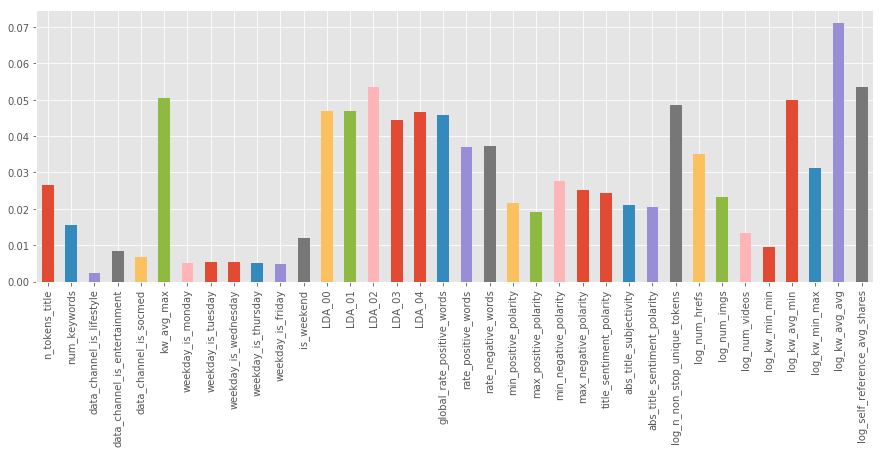

In [44]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(abs(RFclf_rv1.feature_importances_), index = df_rv1_cf.columns)
weights.plot(kind = 'bar')
plt.show()

#### Task 2 with multiclass responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')

The values for the parameters controlling the size of the trees are optimized from:

'criterion': ['gini'], or ['entropy']; 

'n_estimators': [100, 500], 

'max_features': ['auto', 'sqrt'],

'max_depth': [10, 50]}

After searching parameter values for an estimator with GridSearchCV, the Random Forest model accuracy is 0.5011 with parameters {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500} and processing time 1029.9333.

With these optimized parameters, we got the evaluation matrics for Random Forest model:

(1) accuracy 0.4971

(2) precision 0.4787

(3) recall 0.4971 

(4) f1_score 0.4647 

(5) confusion matrix [[1244 1131    0], [ 962  941    0], [1060 1005    0]]

(6) process time 37.5412

#### The top 5 important variables as interpreted with weights are:

log_kw_avg_avg, log_self_reference_avg_shares, LDA_02, log_avg_max, log_kw_avg_min

In [45]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement
# if bootstrap=True (default).

from sklearn.ensemble import RandomForestClassifier

tic = time.clock()

RFclf_rv2 = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', max_depth = 3, 
                               n_estimators = 10, n_jobs = -1)

RFclf_rv2.fit(mrv2_X_train, mrv2_y_train)

param_grid =[{'criterion': ['gini'], 'n_estimators': [100, 500], 'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50]},
             
             {'criterion': ['entropy'],'n_estimators': [100, 500], 'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50]}]

RF_grid_search = GridSearchCV(estimator = RFclf_rv2, param_grid = param_grid, cv = 3)

grid_search = RF_grid_search.fit(mrv2_X_train, mrv2_y_train)

rForest_rv2_acc = grid_search.best_score_
rForest_rv2_params = grid_search.best_params_

rForest_rv2_criterion = rForest_rv2_params['criterion']
rForest_rv2_max_depth = rForest_rv2_params['max_depth']
rForest_rv2_max_features = rForest_rv2_params['max_features']
rForest_rv2_n_estimators = rForest_rv2_params['n_estimators']

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

print("Random Forest model:", "\n accuracy", rForest_rv2_acc, "\n parameters", rForest_rv2_params, 
      "\n processing time", exetime)

Random Forest model: 
 accuracy 0.5010878133375375 
 parameters {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500} 
 processing time 1029.9333


In [46]:
from sklearn.ensemble import RandomForestClassifier

# train and test 

tic = time.clock()

RFclf_rv2 = RandomForestClassifier(criterion = rForest_rv2_criterion, max_depth = rForest_rv2_max_depth,
                                   max_features = rForest_rv2_max_features, n_estimators = rForest_rv2_n_estimators,
                                   n_jobs = -1)

RFclf_rv2.fit(X2_train, y2_train)
y2_predRF = RFclf_rv2.predict(X2_test)

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# calculate statistics

accuracy = '{0:.4f}'.format(mt.accuracy_score(y2_test, y2_predRF))
precision = '{0:.4f}'.format(mt.precision_score(y2_test, y2_predRF, average ='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y2_test, y2_predRF, average = 'weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y2_test, y2_predRF, average = 'weighted'))


# print statistics
print("Random Forest test dataset:", "\n accuracy", accuracy, "\n precision", precision, "\n recall", recall, 
      "\n f1_score", f1_score, "\n confusion matrix\n", confusion_matrix(y2_test, y_predRF), "process time", exetime)


# save statistics for model comparison

raw_data = {'Task': 'rv2', 'Model Name':'RF_rv2', 'Accuracy':accuracy, 'Precision':precision,
            'Recall':recall,'FScore':f1_score,'Processing Time': exetime}


cf_rf2 = pd.DataFrame(raw_data, 
                      columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
                      index = [i_index_rv2 + 1])

cf_rv2_table = cf_rv2_table.append(cf_rf2)

# append model classifier for cross-validation

models_rv2.append(('Random Forest', RFclf_rv2))

Random Forest test dataset: 
 accuracy 0.4971 
 precision 0.4787 
 recall 0.4971 
 f1_score 0.4647 
 confusion matrix
 [[1244 1131    0]
 [ 962  941    0]
 [1060 1005    0]] process time 37.5412


In [47]:
# Interpreting weights
zip_varsRF_rv2 = zip(RFclf_rv2.feature_importances_.T, df_rv2_cf.columns) # combine attributes
zip_varsRF_rv2 = sorted(zip_varsRF_rv2)
for importance, name in zip_varsDT_rv2:
    print('\t%-35s - weight = %9.3f' % ( name, importance)) # now print them out

	LDA_03                              - weight =     0.000
	abs_title_sentiment_polarity        - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	data_channel_is_lifestyle           - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	log_kw_avg_min                      - weight =     0.000
	log_kw_min_max                      - weight =     0.000
	log_kw_min_min                      - weight =     0.000
	log_num_hrefs                       - weight =     0.000
	log_num_videos                      - weight =     0.000
	max_negative_polarity               - weight =     0.000
	max_positive_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_title                      - weight =     0.000
	num_keywords                        - weight =     0.000
	rate_negative_words                 - weight =     0.000
	rate_positive_words                 - weight =     0.000
	title_sentime

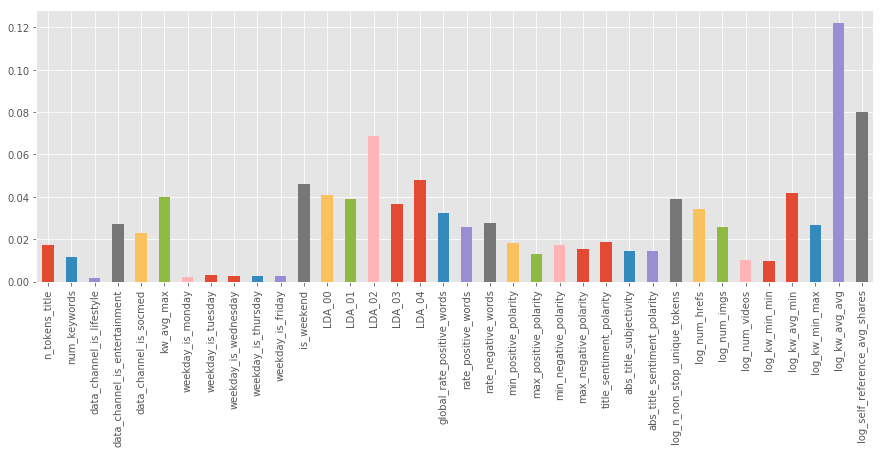

In [48]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(abs(RFclf_rv2.feature_importances_), index = df_rv2_cf.columns)
weights.plot(kind = 'bar')
plt.show()

<a id='GaussianNB'></a>
#### Optimization of Naive Bayes (GaussianNB)
[Back to top](#BacktoTop)

The Naive Bayes doesn't have any parameters to optimize and uses maximum likelihood training to classify and predict for the test set. We will just show a F1 score with confidence interval with an interval and inspect the result of this model in more details in the next section.

#### Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

Naive Bayes has no optimal parameters to adjust and has a F1 score of 0.50.

The evaluation matrics for GaussianNB model:

(1) accuracy 0.5332

(2) precision 0.5450

(3) recall 0.53324 

(4) f1_score 0.4962 

(5) confusion matrix [[2558  629], [2332  824]]

(6) process time 0.0424

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

n_splits = 5
seed = 0

yhat = np.zeros(y.shape) 
cv = StratifiedKFold(n_splits=n_splits, random_state=seed)

scores = []


for train_indices, test_indices in cv1_object.split(mrv1_X_train, mrv1_y_train):
        X_train = mrv1_X_train[train_indices]
        y_train = mrv1_y_train[train_indices]
        X_test  = mrv1_X_train[test_indices]
        y_test  = mrv1_y_train[test_indices]
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        yhat[test_indices] = clf.predict(X_test)
        f1_score = mt.f1_score(y_test, clf.predict(X_test), average='weighted')
        scores.append(f1_score)

scores = np.array(scores)
print("F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1 score: 0.50 (+/- 0.00)


In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import confusion_matrix,classification_report
import time

tic = time.clock()

# train and test 

GNBclf_rv1 = GaussianNB()

GNBclf_rv1.fit(X_train, y_train)
y_predGNB = GNBclf_rv1.predict(X_test)

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# calculate statistics

accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_predGNB))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_predGNB, average ='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_predGNB, average = 'weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y_test, y_predGNB, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("GaussianNB for test dataset:", "\n accuracy", accuracy, "\n precision", precision, "\n recall", recall,
      "\n f1_score", f1_score, "\n confusion matrix\n", confusion_matrix(y_test, y_predGNB), "process time", exetime)

# save statistics for model comparison

raw_data = {'Task': 'rv1', 'Model Name':'GNB_rv1','Accuracy':accuracy,'Precision':precision,
            'Recall':recall,'FScore':f1_score, 'Processing Time': exetime}

cf_rv1_gnb = pd.DataFrame(raw_data,
                          columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
                          index = [i_index_rv1 + 1])

cf_rv1_table = cf_rv1_table.append(cf_rv1_gnb)

#append model classifier for cross-validation

models_rv1.append(('Gaussian Naive Bayes', GNBclf_rv1))

GaussianNB for test dataset: 
 accuracy 0.5332 
 precision 0.5450 
 recall 0.5332 
 f1_score 0.4962 
 confusion matrix
 [[2558  629]
 [2332  824]] process time 0.0424


#### Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')¶

Naive Bayes has no optimal parameters to adjust and has a F1 score of 0.27.

The evaluation matrics for GaussianNB model:

(1) accuracy 0.3810

(2) precision 0.2759

(3) recall 0.3810 

(4) f1_score 0.2678 

(5) confusion matrix [[2102    0  226], [1733    0  206], [1760    1  315]]

(6) process time 0.0439

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

n_splits = 5
seed = 0

yhat = np.zeros(y.shape) 
cv = StratifiedKFold(n_splits=n_splits, random_state=seed)

scores = []


for train_indices, test_indices in cv2_object.split(mrv2_X_train, mrv2_y_train):
        X2_train = mrv2_X_train[train_indices]
        y2_train = mrv2_y_train[train_indices]
        X2_test  = mrv2_X_train[test_indices]
        y2_test  = mrv2_y_train[test_indices]
        clf = GaussianNB()
        clf.fit(X2_train, y2_train)
        yhat[test_indices] = clf.predict(X2_test)
        f1_score = mt.f1_score(y2_test, clf.predict(X2_test), average='weighted')
        scores.append(f1_score)

scores = np.array(scores)
print("F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1 score: 0.27 (+/- 0.00)


In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix as conf
import time

tic = time.clock()

# train and test 

GNBclf_rv2 = GaussianNB()

GNBclf_rv2.fit(X2_train, y2_train)
y2_predGNB = GNBclf_rv2.predict(X2_test)

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# calculate statistics

accuracy = '{0:.4f}'.format(mt.accuracy_score(y2_test, y2_predGNB))
precision = '{0:.4f}'.format(mt.precision_score(y2_test, y2_predGNB, average ='weighted'))
recall = '{0:.4f}'.format(mt.recall_score(y2_test, y2_predGNB, average = 'weighted'))
f1_score = '{0:.4f}'.format(mt.f1_score(y2_test, y2_predGNB, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("GaussianNB for test dataset:", "\n accuracy", accuracy, "\n precision", precision, "\n recall", recall,
      "\n f1_score", f1_score, "\n confusion matrix\n", confusion_matrix(y2_test, y2_predGNB), "process time", exetime)

# save statistics for model comparison

raw_data = {'Task': 'rv2', 'Model Name':'GNB_rv2','Accuracy':accuracy,'Precision':precision,
            'Recall':recall,'FScore':f1_score, 'Processing Time': exetime}

cf_rv2_gnb2 = pd.DataFrame(raw_data,
                           columns = ['Task', 'Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
                           index = [i_index_rv2 + 1])

cf_rv2_table = cf_rv2_table.append(cf_rv2_gnb2)

#append model classifier for cross-validation

models_rv2.append(('Gaussian Naive Bayes', GNBclf_rv2))

GaussianNB for test dataset: 
 accuracy 0.3810 
 precision 0.2759 
 recall 0.3810 
 f1_score 0.2678 
 confusion matrix
 [[2102    0  226]
 [1733    0  206]
 [1760    1  315]] process time 0.0439


<a id='ModelingandEvaluation4-AnalyzeModels'></a>
#### 2.4 - Modeling and Evaluation 4 - Analyze Models (10 points)
[Back to top](#BacktoTop)

Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

In this project, we have accomplished: task 1 for binary response variable ("popular_rv1", 2 groups: 0 = 'Unpopular', 1 = 'Popular') and task 2 for multiclass response variable ("popular_rv2", 3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular') with 4 classification/regression methods for modeling and evaluation:

(1) Logistic Regression Classification

(2) Decision Tree Classification

(3) Random Forest Classification

(4) Gaussian Naive Bayes (GaussianNB)


The model evaluation matrics are Accuracy, Precision, Recall and F1 score, and Processing Time. 

##### Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

From the table and plots as shown below, Random Forest Classification model has the highest accuracy (0.6582) and Precision (0.6582), Recall (0.6582) and F1 score (0.6681), but the longest processing time (around 80 seconds).

Logistic Regression has the lowest values compared with Random Forest, Decision Tree, GussianNB classification methods, and also the lowest processing time (80ms).

This conculsion was further confirmed with cross-validation results and plots as shown in section 2.5. The Random Forest classification model accuracy is: 0.661 with std deviation 0.0049.

#### convert accuracy, precision, recall, F1 score and processing time to numeric values in table cf_rv1_table

In [53]:
# converting acc, pre, recall, fscore and time to numeric values for plots

cf_rv1_table = cf_rv1_table.reset_index(drop = True)
cf_rv1_table['Precision'] = pd.to_numeric(cf_rv1_table['Precision'])
cf_rv1_table['Accuracy'] = pd.to_numeric(cf_rv1_table['Accuracy'])
cf_rv1_table['FScore']= pd.to_numeric(cf_rv1_table['FScore'])
cf_rv1_table['Processing Time'] = pd.to_numeric(cf_rv1_table['Processing Time'])
cf_rv1_table['Recall'] = pd.to_numeric(cf_rv1_table['Recall'])
cf_rv1_table

,Task,Model Name,Accuracy,Precision,Recall,FScore,Processing Time
0,rv1,LR_rv1,0.4942,0.4972,0.4942,0.3275,0.0786
1,rv1,DT_rv1,0.6328,0.6328,0.6328,0.6328,0.3262
2,rv1,RF_rv1,0.6582,0.6582,0.6582,0.6581,78.8250
3,rv1,GNB_rv1,0.5332,0.5450,0.5332,0.4962,0.0424


#### plot accuracy and processing time

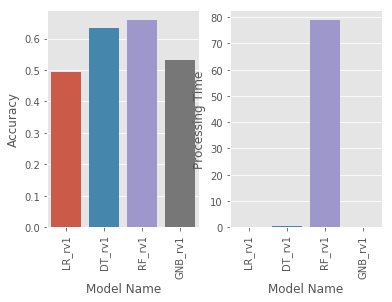

In [54]:
from pylab import rcParams
%matplotlib inline

fig, axs = plt.subplots(ncols = 2)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation = 90 )
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation = 90)
sns.barplot(x = 'Model Name', y = 'Accuracy', data = cf_rv1_table, ax = axs[0])
sns.barplot(x = 'Model Name', y = 'Processing Time', data = cf_rv1_table, ax = axs[1])

#### Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')¶

From the table and plots as shown below, Random Forest Classification model has the highest accuracy (0.4971) and Precision (0.4787), Recall (0.4971) and F1 score (0.4647), but the longest processing time (around 40 seconds).

Logistic Regression has the lowest values (0.3251) compared with Random Forest, Decision Tree, GussianNB classification methods, and also the lowest processing time (20ms).


This conculsion was further confirmed with cross-validation results and plots as shown in section 2.5. The Random Forest classification model accuracy is: 0.498 with std deviation 0.0068.

#### convert accuracy, precision, recall, F1 score and processing time to numeric values in table cf_rv2_table

In [55]:
# converting acc, pre, recall, fscore and time to numeric values for plots

cf_rv2_table = cf_rv2_table.reset_index(drop = True)
cf_rv2_table['Precision'] = pd.to_numeric(cf_rv2_table['Precision'])
cf_rv2_table['Accuracy'] = pd.to_numeric(cf_rv2_table['Accuracy'])
cf_rv2_table['FScore']= pd.to_numeric(cf_rv2_table['FScore'])
cf_rv2_table['Processing Time'] = pd.to_numeric(cf_rv2_table['Processing Time'])
cf_rv2_table['Recall'] = pd.to_numeric(cf_rv2_table['Recall'])
cf_rv2_table

,Task,Model Name,Accuracy,Precision,Recall,FScore,Processing Time
0,rv2,LR_rv2,0.3251,0.4803,0.3251,0.1604,0.1767
1,rv2,DT_rv2,0.4717,0.4545,0.4717,0.4480,0.2839
2,rv2,RF_rv2,0.4971,0.4787,0.4971,0.4647,37.5412
3,rv2,GNB_rv2,0.3810,0.2759,0.3810,0.2678,0.0439


#### plot accuracy and processing time

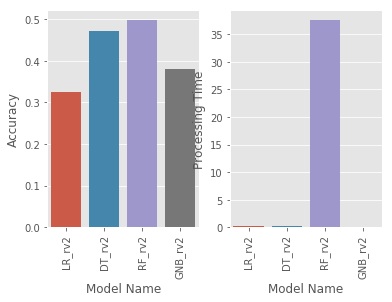

In [56]:
from pylab import rcParams
%matplotlib inline

fig, axs = plt.subplots(ncols = 2)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation = 90 )
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation = 90)
sns.barplot(x = 'Model Name', y = 'Accuracy', data = cf_rv2_table, ax = axs[0])
sns.barplot(x = 'Model Name', y = 'Processing Time', data = cf_rv2_table, ax = axs[1])

#### Tasks 1 and 2 accuracy comparision

In this project, we split target variable "shares" either to binary (task 1) or to multiclass (task 2).

Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')¶

Random Forest Classification methods was the best model for predication, far better than Logistic Regression, Decision Tree, GaussianNB methods. However, the model accuracy for binary splits (0.6582) was better than that of multiclass splits (0.4971). 

<a id='ModelingandEvaluation5-ModelProsandCons'></a>
#### 2.5 - Modeling and Evaluation 5 - Model Pros and Cons (10 points)
[Back to top](#BacktoTop)

Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

#### A. Logistic Regression

Logistic regression has advantages for (1) convenient probability scores for observations; (2) efficient implementations available across tools; (3) multicollinearity is not really an issue and can be countered with L2 regularization to an extent; (4) wide spread industry comfort for logistic regression solutions.

However, there are also some diadvantages for (1) not performing well when feature space is too large; (2) not handling large number of categorical features/variables, (3) relying on transformations for non-linear features; (4) ralying on entire dataset.

In this project, accuracy for task 1 is 0.493 +/- 0.0007, and for task 2 is 0.323 +/- 0.0004.


#### B. Decision Tree Classfication

Decision tree classfication is: (1) simple to understand and to interpret; (2) handle both numerical and categorical data; (3) they are pretty fast at computation after they’ve been tuned; (4) tree-based models can also handle missing or outlier data.

However, the disadvantages are (1) unstable to initial conditions or variations in the data; (2) overfitting.

In this project, accuracy for task 1 is 0.634 +/- 0.0090, and for task 2 is 0.472 +/- 0.0076.


#### C. Random Forest Classfication

Random Forest is a bagging technique for both classification and regression. Random forest is flexible and can enhance the accuracy/performance of the weak algorithm to a better extent, at the expense of heavier computational resources required. 

However, in terms of accuracy for classification or MSE for regression, the solution quality in each bag should be relatively high in order for bagging to perform promisingly.

In this project, accuracy for task 1 is 0.661 +/- 0.0049, and for task 2 is 0.498 +/- 0.0068.


#### D. Naive Bayes (Gaussian NB)

GaussianNB is: (1) easy and fast to predict class of test data set; (2) perform well in multi class prediction; (3) perform well in case of categorical input variables compared to numerical variable(s).

However, we have to use the smoothing technique  (Laplace estimation) to handle the "Zero Frequency" issue; (2) the assumption of independent predictors which is not possible in the real life.

In this project, accuracy for task 1 is 0.542 +/- 0.0118, and for task 2 is 0.387 +/- 0.0049


#### Summary for this project

In this project, we split target variable "shares" either to binary (task 1) or to multiclass (task 2).

Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')¶

#### We conclude that: 

(1) Random Forest classfication is the best model; 

(2) making multiclass approach for response variable could not bring higher accuracy.

#### Task 1: binary responsible variable "popular_rv1" (2 groups: 0 = 'Unpopular', 1 = 'Popular')

#### accuracy results from cross-validation ( cv  = 10 )

In [57]:
from sklearn import model_selection

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'

for name, model in models_rv1:
    cv_results = model_selection.cross_val_score(
        model,
        X_train,
        y_train,
        cv = 10,
        scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "\n\t%-35s mean (std dev): %.3f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    #print(cv_results)
    print(msg)


	Logistic Regression                 mean (std dev): 0.493 (0.0007)

	Decision Tree                       mean (std dev): 0.634 (0.0090)

	Random Forest                       mean (std dev): 0.661 (0.0049)

	Gaussian Naive Bayes                mean (std dev): 0.542 (0.0118)


#### boxplot accuracy for different models after cross-validation ( cv = 10)

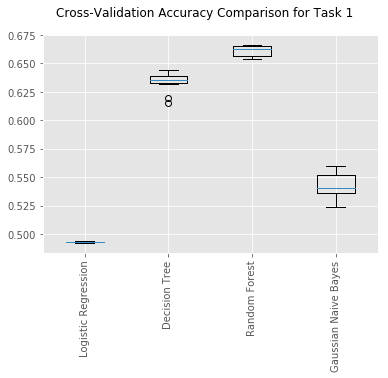

In [58]:
# boxplot accuracy comparison

fig = plt.figure()
fig.suptitle('Cross-Validation Accuracy Comparison for Task 1')
ax = fig.add_subplot(111)

plt.boxplot(results)

ax.set_xticklabels(names, rotation=90)
plt.show()

#### Task 2: multiclass with responsible variable "popular_rv2" (3 groups: 0 = 'Unpopular', 1 = 'Medium', 2 = 'Popular')¶

#### accuracy results from cross-validation ( cv  = 10 )

In [59]:
from sklearn import model_selection

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'

for name, model in models_rv2:
    cv_results = model_selection.cross_val_score(
        model,
        X2_train,
        y2_train,
        cv = 10,
        scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "\n\t%-35s mean (std dev): %.3f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    #print(cv_results)
    print(msg)

/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.",


	Logistic Regression                 mean (std dev): 0.323 (0.0004)

	Decision Tree                       mean (std dev): 0.472 (0.0076)

	Random Forest                       mean (std dev): 0.498 (0.0068)

	Gaussian Naive Bayes                mean (std dev): 0.387 (0.0049)


#### boxplot accuracy for different models after cross-validation ( cv = 10)

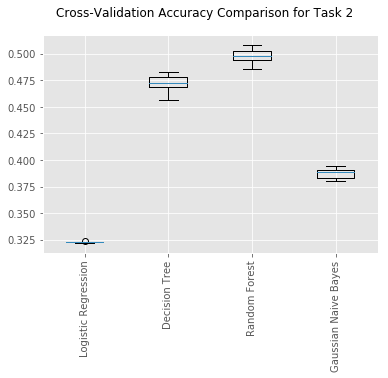

In [60]:
# boxplot accuracy comparison

fig = plt.figure()
fig.suptitle('Cross-Validation Accuracy Comparison for Task 2')
ax = fig.add_subplot(111)

plt.boxplot(results)

ax.set_xticklabels(names, rotation=90)
plt.show()

<a id='ModelingandEvaluation6-ImportantAttributes'></a>
#### 2.6 - Modeling and Evaluation 6 - Important Attributes (10 points)
[Back to top](#BacktoTop)

Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

As mentioned in the previous **Section 2.5**, the random forest model was our best one in terms of classification accuracy. For this reason, we decided to use this model to investiagte

In [61]:
# Interpreting weights
zip_varsRF_rv1 = zip(RFclf_rv1.feature_importances_.T, df_rv1_cf.columns) # combine attributes
zip_varsRF_rv1 = sorted(zip_varsRF_rv1)
for importance, name in zip_varsDT_rv1:
    print('\t%-35s - weight = %9.3f' % ( name, importance)) # now print them out

	LDA_01                              - weight =     0.000
	abs_title_sentiment_polarity        - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	data_channel_is_lifestyle           - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	log_num_videos                      - weight =     0.000
	max_negative_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_title                      - weight =     0.000
	rate_negative_words                 - weight =     0.000
	weekday_is_friday                   - weight =     0.000
	weekday_is_monday                   - weight =     0.000
	weekday_is_thursday                 - weight =     0.000
	weekday_is_tuesday                  - weight =     0.000
	weekday_is_wednesday                - weight =     0.000
	num_keywords                        - weight =     0.003
	log_num_imgs                        - weight =     0.003
	max_positive_

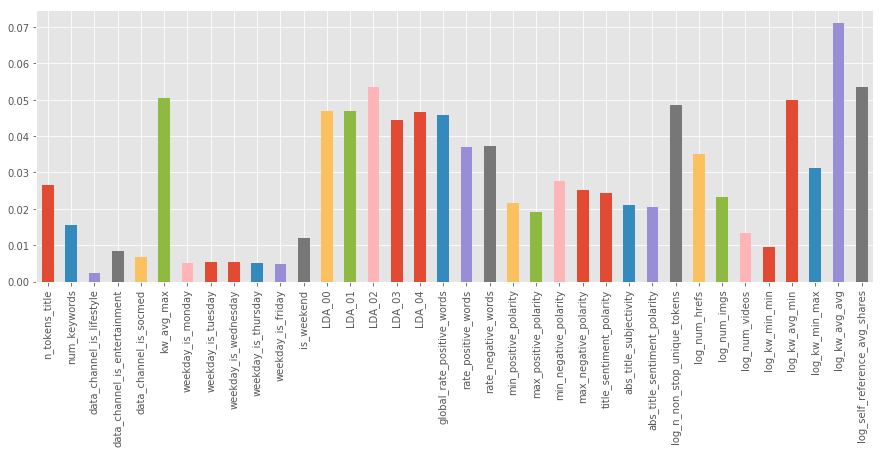

In [62]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(abs(RFclf_rv1.feature_importances_), index = df_rv1_cf.columns)
weights.plot(kind = 'bar')
plt.show()

From our analysis we determined that the attributes that were the most important to our model that achieved the highest accuracy were:

(1). log_kw_avg_avg

(2). log_sel_reference_avg_shares

(3). LDA_02

(4). log_kw_avg_max

(5). log_kw_avg_min

To determine the level importance for each of our attributes we used the feature_importances attribute of the scikitlearn function DecisionTreeClassifier.

feature_importances returns a value for the weight of each attribute used in the model, the higher the value of the weight, the more important the attribute is to the model.

The 4 attributes listed account for over 66% of the attribute weight on the model, this is quite significant as there are 20 attributes in the model. The four attributes were the only attributes to individual account for over 10% of the weight on the model, their respective scores are listed below:
(1). data_channel_is_entertainment with weight 10%
(2). log_sel_reference_avg_shares with weight 11%
(3). is_weekend	with weight 13%
(4). log_kw_avg_avg	with weight 31%

Let’s take a look at each variable and discuss why it is an important attribute for determining whether or not an online news article will be popular.

#### (1).  log_kw_avg_avg , (4). log_kw_avg_max (5) log_kw_avg_min

This attribute gives us the log transformed value for the average and minimal amounts of times articles that use the same keywords as the article being evaluated have been shared. It makes sense that this attribute would be important to our model. If an article uses the same keywords as another article it will likely show up for suggested reading to people who read the other article, the amount of shares those articles were experiencing would be relevant data to a model trying to predict if the article that will use those same keywords will be popular.

#### (2). log_sel_reference_avg_shares

This attribute provides the log transformed value of the average amount of shares the other Mashable articles that are referenced in the article being evaluated. It makes sense that this attribute would be important to our model. For another article to be referenced in a given article it is safe to assume that it is somehow related to the article being evaluated, if those referenced articles had high amounts of shares then they are written about a similar topic that was popular and should be important to a model trying to determine whether an article will be popular or not.

#### (3). LDA_02 is the closeness to LDA topic 2, related to article contents


#### Besides, we are also interesed in the channel and weekday variables:

#### data_channel_is_entertainment

This attribute indicates whether or not an article was written about an entertainment topic. It makes sense that this attribute would be important in determine if the article will be popular, as there are more magazines, blogs, websites, etc. for distributing information and about entertainment related new than there are other topics, it stands to reason that the attribute that shows whether articles were written about entertainment or not would important for a model that is trying to determine if the article will be popular. 

#### is_weekend

This attribute indicates whether the article was published on a weekend (Saturday or Sunday) or not. Social media engagement is typically highest during the week (Monday-Friday) so this attribute having importance on our model makes sense. Certain days of the week tend to be higher than other but every weekday sees more traffic than Saturday or Sunday. It makes sense that if our model if determining popularity by number of shares on social media platforms that it would be important to know which day it will be published. If you wanted to maximize your number of share you should probably post on days that have higher amounts of activity on social media, which tend to be during the week, so this attribute telling us if it is on the weekend or not is an important one.



<a id='Deployment'></a>
### 3 - Deployment (5 points)
[Back to top](#BacktoTop)

How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

#### 3.1. How useful is the model for interested parties? 

Interested parties for our model include, publishers and writers. Publishers can benefit from the model by using it to determine the advertisement pricing to apply to articles, if they can predict that the article will be popular they could charge higher rates for those articles. Writers can use the model in a similar way. If a writer were able to determine if their article will be popular before it gets published they could us that to negotiate higher rates for publishers to be able to publish their articles.


#### 3.2. How would we measure the model’s success?

The model’s success can be measured by reviewing how well it performs in predicting whether or not articles will be popular for the interested parties, our model currently has an accuracy score of just over 66%, so we would consider our model a success as long as it maintained that level of accuracy for the interested parties. Publishes would consider it a success if they were able to use it to increase their advertising revenue, and writers would consider it a success if were able to increase the rates they charged by using the model to help them write articles that will be shared more often and be more popular

####  3.3. How would your deploy your model for interested parties?

This model would best be deployed through a web portal where various variables could be used when running Random Forest model; Knowing the data will be very importatn to deploy this model. Experienced users or well trained data analysts should be the ones to run the model as they will have the knowledge to change variables as needed. 

#### 3.4. What other data should be collected?

We would recommend collecting the following additional data:

(1). Amount of shares at time intervals (1 day, 7 days, 30 days)

This data would be important to capture so that publishers can tell how long quickly articles are gaining traction and could use them to make better advertising pricing policies and have benchmarks to ensure they are charging the appropriate price for the popularity of their article.

(2). Amount of share per platform

This would be important to capture so writers and publisher could understand where their articles are being shared and optimize the content of the articles for the platforms where it is being shared the most, or change it to encourage more sharing on platforms where it wasn’t being frequently shared. 

#### 3.5. How often would the model need to be updated, etc.?

The model would need to be updated as new data is obtained to keep up with the changing social media landscape. As social media platforms continue their climb as the most common way for information to be published and distributed, the benchmark for number of share it requires to be classified as popular will need to be updated to keep up with the norms as they are recalculated. We would recommend recalculating the benchmarks on at least quarterly basis. 

<a id='ExceptionalWork '></a>
### 4 - Exceptional Work  (10 points)
[Back to top](#BacktoTop)


You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

#### In the exceptional work section 4, we have accomplished these exceptional works:

(0) used class sklearn.model_selection.GridSearchCV for Section 2 

(1) compared Decision Tree, Random Forest, Extra Trees, Gradient Boosting Classifications

(2) constructed pipeline with Principal component analysis (PCA) and K Nearest neighbor (KNN), Random Forest, GussianNB classfications.

#### 4.0. Use class sklearn.model_selection.GridSearchCV in Section 2

#### 4.1. Check accuracies with different tree model classification methods

For checking accuracies with different tree model classification methods, we found Random Froest and Extra Random Trees classfication are better than decision tree methods (the Boosted Tree method takes very long time to run, so we did not include this classification here).

These accuracies for different methods are:

(1) Stump 0.5960

(2) Tree 0.5695

(3) Random Trees 0.6615

(4) Extra Random Trees 0.6544

(5) Boosted Tree (skipped due a very long running time)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

num_estimators = 500 # lets train some trees above choose 500 accuracy 0.66

clf_rv1_array = [
    ('Stump',              DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth = 50, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators = num_estimators, min_samples_split = 2)),
    # ('Boosted Tree',       GradientBoostingClassifier(n_estimators = num_estimators))
]

for clf in clf_rv1_array:
    acc_rv1 = cross_val_score(clf[1], mrv1_X_train, mrv1_y_train, cv = 5)
    print (clf[0], acc_rv1.mean())

Stump 0.5959639971023329
Tree 0.5694777039819613
Random Trees 0.6614532310610131
Extra Random Trees 0.654421604254693


#### 4.2. Use pipeline to take PCA, then fit a different classifier (KNN, RF, Naive, Gussian)

Principal Component Analysis (PCA) is a feature extraction methods that use orthogonal linear projections to capture the underlying variance of the data.

PCA can be viewed as a special scoring method under the SVD algorithm. It produces projections that are scaled with the data variance. Projections of this type are sometimes preferable in feature extraction to the standard non-scaled SVD projections.

we will provide an overview of using principle component analysis (PCA) as a feature extraction with various classifiers. It was observed that the performance rate of the classifiers after using PCA to reduce the dimension of data improved.

A pipeline allows us to cascade operations. The pipeline can be setup to run PCA, then fit the reduced data with a classifier. The beauty of pipelines comes through when performing different cross validations.

#### 4.2.1 KNN

Definition and optimization of K Nearest Neighbors (KD Tree)

K Nearest Neighbors is for the prediction of values based on training their nearest neighbors by a certain n_neighbors count in order to form classification models to predict the y_hat for the test set. Optimization result for different values of "n_neighbors" is printed below. When n_neighbors is 2, the f1_score is highest at 0.4838.

#### 4.2.1.1. Define optimized n_neighbors for KNN

In [64]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

seed = 0
n_splits = 5
cv_object = ShuffleSplit(n_splits = n_splits, test_size  = 0.2)

result = []
scores = []

for n_neighbors in range(2, 36)[::6]:
    yhat = np.zeros(y.shape) # we will fill this with predictions
    cv = StratifiedKFold(n_splits=n_splits, random_state=seed)
    for train_indices, test_indices in cv_object.split(mrv1_X_train, mrv1_y_train):
        X_train = mrv1_X_train[train_indices]
        y_train = mrv1_y_train[train_indices]
        X_test  = mrv1_X_train[test_indices]
        y_test  = mrv1_y_train[test_indices]
        
        # in order to reduce the time for training KNeighborsClassifier
        # we reduce the dimetions of the data from 1717 to 100 and we use kd_tree algorithm
        pca = PCA(n_components = 2, random_state = seed) # change to 24
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        clf = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm = 'kd_tree', weights = 'distance')
        clf.fit(X_train, y_train)
        yhat[test_indices] = clf.predict(X_test)

    f1_score = mt.f1_score(y, yhat, average='weighted')
    print ('n_neighbors:', n_neighbors, ', f1_score:', f1_score)

n_neighbors: 2 , f1_score: 0.48380855023150343
n_neighbors: 8 , f1_score: 0.47956167629854407
n_neighbors: 14 , f1_score: 0.4737814948229921
n_neighbors: 20 , f1_score: 0.47661242907281237
n_neighbors: 26 , f1_score: 0.4772043960353043
n_neighbors: 32 , f1_score: 0.4779507472897551


#### 4.2.1.2. KNN with optimized value for n_neighbors  = 2 ( accuracy = 0.6098)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


# create variables
X = mrv1_X_train
y = mrv1_y_train
yhat = np.zeros(y.shape)

scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits = 10)

# The classifier object to define the type
clf = KNeighborsClassifier(n_neighbors = 2)

# get predictions and save to the correct row in yhat
for train, test in cv.split(X, y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)

KNN accuracy 0.6098376162699038


#### 4.2.2. Pipeline with PCA and KNN ( accuracy = 0.6306)

In [66]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

# setup pipeline to take PCA and fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components = 36, svd_solver = 'randomized')),
     ('CLF',KNeighborsClassifier(n_neighbors = 32))]
)

# get predictions and save to the correct row in yhat
for train, test in cv.split(X, y):
    clf_pipe.fit(X[train], y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN, pipeline accuracy', total_accuracy)

KNN, pipeline accuracy 0.63058489673656


#### plot class accuracy

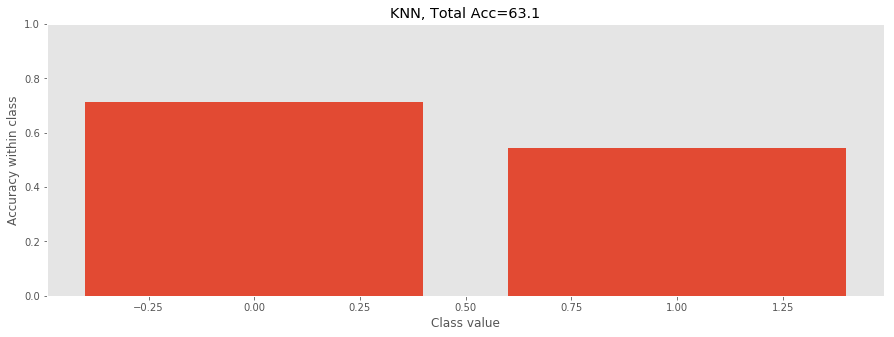

In [67]:
def per_class_accuracy(ytrue, yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y, yhat, title="KNN")

#### 4. 2. 3. Pipeline with PCA and  Random Forest (RF) classifier (accuracy = 0.6424, raw accuracy = 0.6567))

#### Definition and optimization of Random Forest

Random forest is for the prediction of values based on training decision trees by by a certain max depth in order to form classification models to predict the y_hat for the test set. Optimization result for different test values of "max_depth" is printed below.

When max_depth is 201, the f1_score starts to plateau at 0.5844.

#### Optimize max_depth value to 500

max_depth: 1 F1 score: 0.5633019020220894
max_depth: 101 F1 score: 0.586817208732379
max_depth: 201 F1 score: 0.5843813788714604
max_depth: 301 F1 score: 0.5838575238646292
max_depth: 401 F1 score: 0.5835153912201609


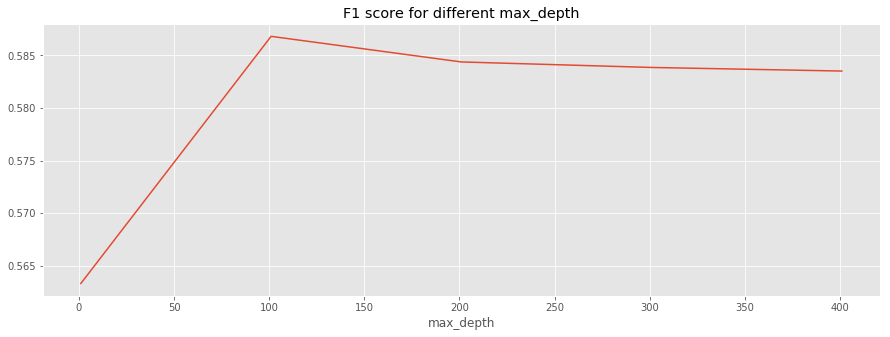

In [68]:
seed = 0
n_splits = 5
cv_object = ShuffleSplit(n_splits = n_splits, test_size  = 0.2)

result = []
index = []

for max_depth in range(1, 500)[::100]:
    yhat = np.zeros(y.shape, dtype=int)
    cv = StratifiedKFold(n_splits=n_splits, random_state=seed)
    for train_indices, test_indices in cv_object.split(mrv1_X_train, mrv1_y_train):
        X_train = mrv1_X_train[train_indices]
        y_train = mrv1_y_train[train_indices]
        X_test  = mrv1_X_train[test_indices]
        y_test  = mrv1_y_train[test_indices]
        clf = RandomForestClassifier(max_depth=max_depth, random_state=seed, n_estimators=40)
        clf.fit(X_train, y_train)
        yhat[test_indices] = clf.predict(X_test)

    f1_score = mt.f1_score(y, yhat, average='weighted')
    print ('max_depth:', max_depth, 'F1 score:', f1_score)
    result.append(f1_score)
    index.append(max_depth)

plt.title('F1 score for different max_depth')
pd.Series(result, index=pd.Index(index, name='max_depth'), name='f1_score').plot();

#### Pipeline of PCA with Random Forest

Pipeline accuracy 0.6424404855746492


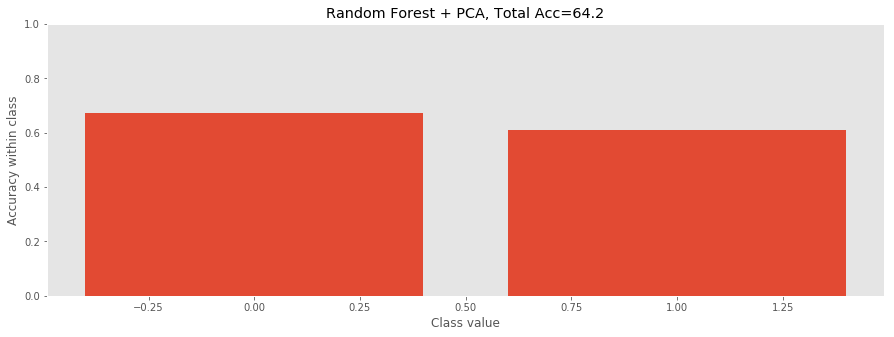

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf_pipe = Pipeline(
    [('PCA', PCA(n_components = 36, svd_solver = 'randomized')),
     ('CLF',RandomForestClassifier(max_depth = 200, n_estimators = 150, n_jobs = -1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(y, yhat, title="Random Forest + PCA")

#### Random Forest only ( raw )

Accuracy 0.6566924168374586


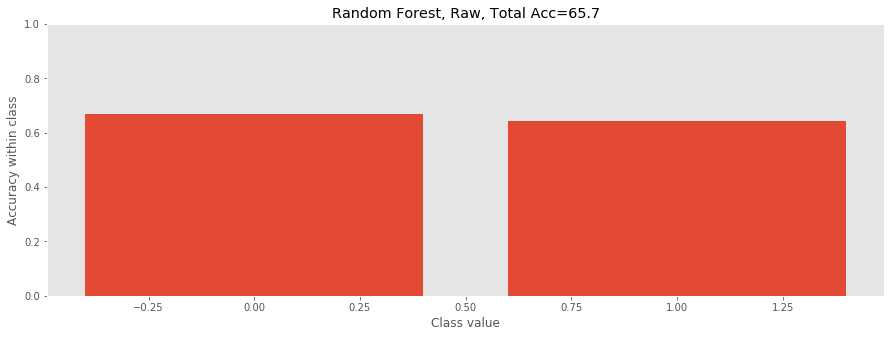

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 500, n_estimators=150, n_jobs=-1, oob_score = True)

# get predictions and save to the correct row in yhat
for train, test in cv.split(X, y):
    clf.fit(X[train], y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y, yhat, title="Random Forest, Raw")

#### 4.2.4. Pipleline with PCA  and GaussianNB ( accuracy = 0.5920)

Pipeline accuracy 0.5920227021913921


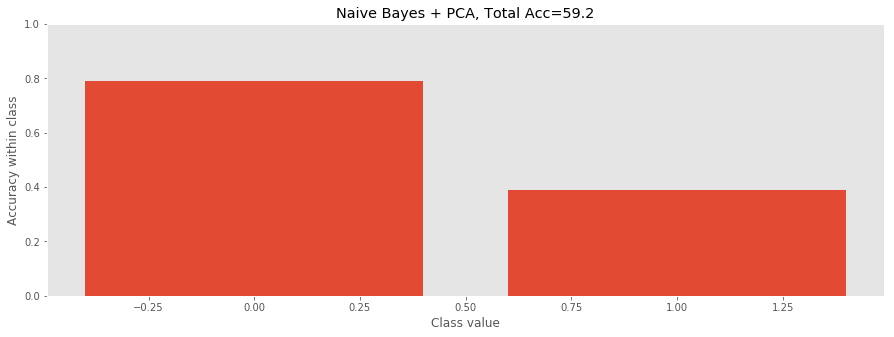

In [71]:
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA and fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=36,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

# get predictions and save to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Naive Bayes + PCA")

#### Summary for the accuracy values for different pipelines:

(1) PCA + KNN  (accuracy = 0.6306, raw accuracy = 0.6098 ) when n_neighbors = 2

(2) PCA + Random Forest (accuracy = 0.6424, raw accuracy = 0.6567) when max_depth = 200

(3) PCA + GaussianNB ( accuracy = 0.5920)

#### Conclusion

The pipeline of PCA with Random Forest has a accuarcy at 0.6392, higher than the accuracies of other combinations, but lower than random forest classification only. When thinking about the Random Forest accuracy results in Section 4 after grid parameter selection, the model accuracy is around 0.66, higher than pipeline method.  Therefore, grid parameter selections is very important for Random Parameter classification.

#### Resources
(1).  The Grand Poobah Classification Notebook for pipeline with PCA and other classfiers (http://localhost:8888/notebooks/DM_u06_Grand%20Poobah%20Classification.ipynb)

(2). Decision Trees (http://scikit-learn.org/stable/modules/tree.html)

(3). sklearn.model_selection.GridSearchCV (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

(4). sklearn.ensemble.RandomForestClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

(5). sklearn.linear_model.LogisticRegression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

(6). sklearn.naive_bayes.GaussianNB (http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)